## Capston Project Heart Disease Predition - Group 2

#### Problem Statement
1. World Health Organization has estimated 12 million deaths occur worldwide; every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardiovascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high-risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk 

2. We have to predict whether the patient has 10-year risk of future coronary heart disease (CHD)


#### Details

Data:
4238 rows, 16 columns

Data Structure:
    
Demographic
Sex: male or female(Nominal)
Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
Current Smoker: whether or not the patient is a current smoker (Nominal)
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
Tot Chol: total cholesterol level (Continuous)
Sys BP: systolic blood pressure (Continuous)
Dia BP: diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
Glucose: glucose level (Continuous)

Predict variable (desired target)
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Importing necessary librarires

In [21]:
#Basic libraries for dataframes and numeric computations
import numpy as np
import pandas as pd

#Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
#!pip install impyute
from impyute.imputation.cs import mice
#!pip install dython --> #corelation for categorical attributes
from dython.nominal import associations

#Scale data
from sklearn.preprocessing import MinMaxScaler
#For ourlier detection
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#PCA
from sklearn.decomposition import PCA

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
import warnings
warnings.filterwarnings('ignore')
#!pip install plotnine
#from plotnine.data import mpg
#from plotnine import ggplot, aes, facet_grid, labs, geom_point

#Class imbalance
##!pip install imblearn
#Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

#Modelling
#Import Library of Logistic Regression
from sklearn.linear_model import LogisticRegression


### Loading the heart diseaase data

In [22]:
df = pd.read_csv('Heart Disease.csv')

# DATA OVERVIEW

In [23]:
#Sample the data
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [24]:
#Get shape of the data
df.shape

#Rows = 4238
#Columns = 16

(4238, 16)

In [25]:
#Describe the data and observe distribution of data
df.describe(include = "all")

#1.Observe null counts in each field
#2.Observe Outliers 
#3.Observe min and max values
#4.Observe mean and std

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [26]:
df.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

In [27]:
#Duplicates check:
len(df[df.duplicated()])

# We observe that the dataset doesn't have any duplicate rows

0

In [28]:
#Listing unique value counts in each feature
def getUniqueValues(data):
    colNames = data.columns
    listUnique = []
    for col in colNames:
        listUnique.append([col, data[col].nunique()])

    d1 = pd.DataFrame(listUnique)
    d1.columns = ['Feature Name', 'Unique Value']
    d1 = d1.sort_values(by='Unique Value', ascending=False)
    return d1

getUniqueValues(df)

#We observe that the following features should be treated as categorical in the future:
#'education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'

Feature Name  Unique Value
12              BMI          1363
9           totChol           248
10            sysBP           234
11            diaBP           146
14          glucose           143
13        heartRate            73
1               age            39
4        cigsPerDay            33
2         education             4
0              male             2
3     currentSmoker             2
5            BPMeds             2
6   prevalentStroke             2
7      prevalentHyp             2
8          diabetes             2
15       TenYearCHD             2

In [29]:
#We would like to manually identify education as a categorical field and assign appropriate categories
df.education.value_counts(dropna=False)

1.0    1720
2.0    1253
3.0     687
4.0     473
NaN     105
Name: education, dtype: int64

In [10]:
#Replacing Education with known categories
df["education"].replace(1, "Some High School", inplace = True)
df["education"].replace(2, "High School", inplace = True)
df["education"].replace(3, "Some College", inplace = True)
df["education"].replace(4, "College", inplace = True)

In [30]:
#checking for class imbalance problem:
df.TenYearCHD.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

###### Our data has a class imbalance problem. Need to address this later

In [31]:
#Checking data types of the data
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'], float64: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']}

# DATA PREPARATION AND FEATURE ENGINEERING

#### Technical Steps

1. Drop columns which are not required
2. Find missing value
3. Visualize missing value
4. Impute missing value 
5. Find Outlier
6. Single variate
7. Multi variate
8. Perform feature engineering
9. Split dataset between training and test in the ration of 70:30

#### 1.Drop columns which are not required

In [32]:
#View all columns
df.columns
#We observe that by viewing the data and attributes, there are no attributes that need to be manually removed
#All attributes will need to go through pre-processing

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [39]:
#identifyin rows to drop
df.education.value_counts(dropna=False)

1.0    1720
2.0    1253
3.0     687
4.0     473
NaN     105
Name: education, dtype: int64

In [15]:
#Option 1: We can drop the rows with unknown education as we cannot guess this and it's a small percentage
#df = df[df['education'].notna()]
#df.education.value_counts(dropna=False)

#Option 2: mode impute educations. In this case Some high school has the highest frequency 

Some High School    1720
High School         1253
Some College         687
College              473
Name: education, dtype: int64

In [40]:
df.reset_index(drop=True, inplace=True)
df.shape

(4238, 16)

In [41]:
#checking for any single value columns
def removeSingleValueColumns(data):
    d1 = data.copy()
    for col in d1.columns:
        if d1[col].nunique() == 1:
            d1 = d1.drop([col], axis=1)
    return d1

df=removeSingleValueColumns(df)

#No single value colums are present hence no attributes were dropped

#### 2. Find missing value

In [42]:
#Check for missing value raw counts
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [44]:
#Check for missing values in percentage

def getMissingCount(data):
    missingCount = data.isnull().sum() * 100/ len(data)
    return missingCount

getMissingCount(df)


male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [45]:
def getMissingCountpercent(df):
        mis_val_table_ren_columns = pd.DataFrame({
            'dtype': df.dtypes,
            'num_missing': df.isnull().sum(),
            '% missing': round(100 * df.isnull().sum() / len(df), 2)
            }).sort_values('num_missing', ascending=False)
        #missingCount = data.isnull().sum() * 100/ len(data)
                
        return mis_val_table_ren_columns

data_missing = getMissingCount(df)
print(data_missing)

getMissingCountpercent(df)
#We observe that Glucose has the highest % of nulls = 9%, followed by education at 2.4%

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


dtype  num_missing  % missing
glucose          float64          388       9.16
education        float64          105       2.48
BPMeds           float64           53       1.25
totChol          float64           50       1.18
cigsPerDay       float64           29       0.68
BMI              float64           19       0.45
heartRate        float64            1       0.02
male               int64            0       0.00
age                int64            0       0.00
currentSmoker      int64            0       0.00
prevalentStroke    int64            0       0.00
prevalentHyp       int64            0       0.00
diabetes           int64            0       0.00
sysBP            float64            0       0.00
diaBP            float64            0       0.00
TenYearCHD         int64            0       0.00

###### Since missing values are lower than 10%, we don't need to discard any attribute. We can impute accordingly.

#### 3. Visualize missing value

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


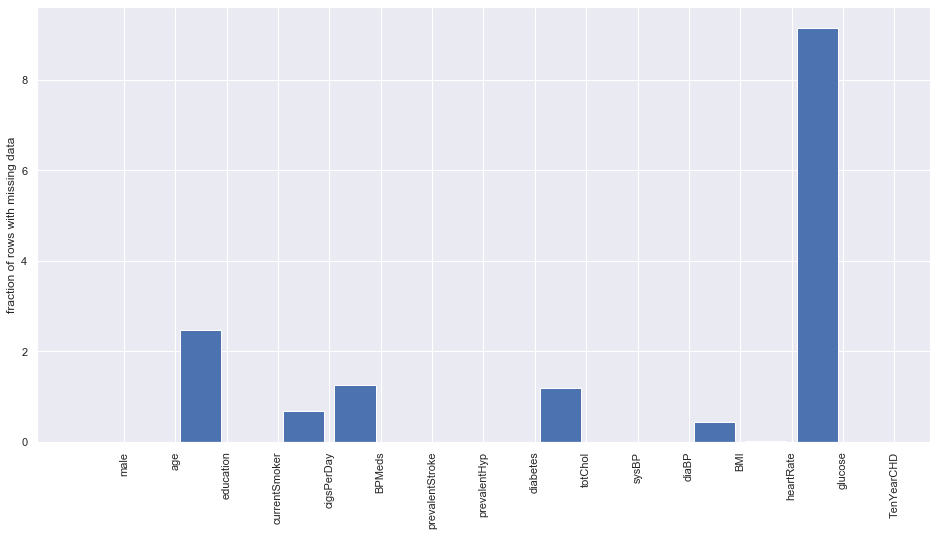

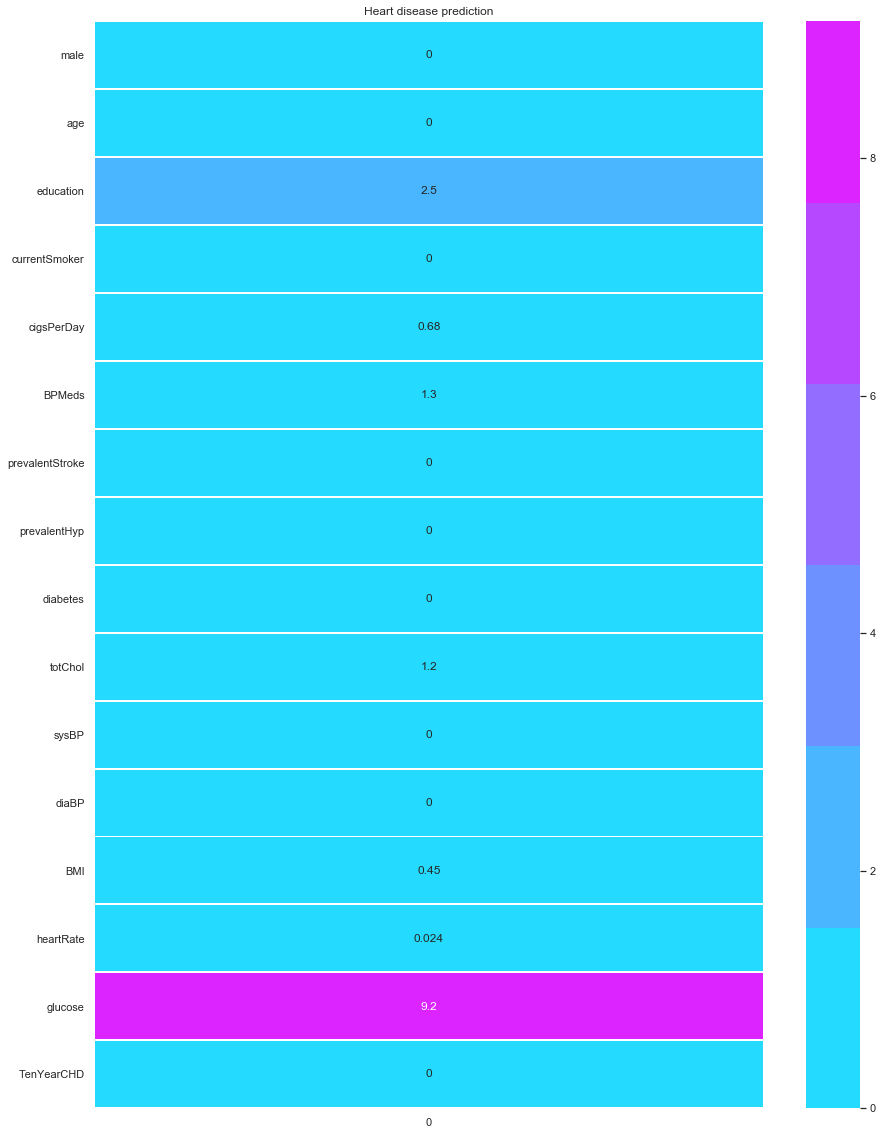

In [46]:
#Visualizing the missing values

def visualizeMissingValue(data):
    missingCount = getMissingCount(data)
    #missingCount = data.isnull().sum()/ len(data)
    print(missingCount)
    plt.figure(figsize=(16, 8))
    plt.xticks(np.arange(len(missingCount)) + 0.5, missingCount.index, rotation='vertical')
    plt.ylabel('fraction of rows with missing data')
    plt.bar(np.arange(len(missingCount)), missingCount)
    plt.show()

    plt.figure(figsize=(15, 20))
    sns.heatmap(pd.DataFrame(data.isnull().sum() / data.shape[0] * 100), annot=True,
    cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
    plt.title("Heart disease prediction")
    plt.show()
    
visualizeMissingValue(df)

In [47]:
#Identifying columns with high percentage of nulls to drop

def identifyColsToDrop(data, threshold=30.0):
    missingCols = getMissingCount(data)
    colsToDrop = missingCols[missingCols > threshold].index.values
    #colsToDrop = [col for (col, perc) in missingCols[missingCols > threshold].items()]
    return colsToDrop

def dropColumn(data, threshold):
    colsToDrop = self.identifyColsToDrop(data, threshold)
    data1 = data.drop(colsToDrop,axis=1)
    return data1

identifyColsToDrop(df)

# We see that there aren't any nulls > 30% in any attribute

array([], dtype=object)

In [48]:
#Alternate method to check for nulls > threshold
hf = df.isna().sum()
rows = df.count()[0]
Null_cols = hf[((hf*100/rows)>30.00)==True]*100/rows
Null_cols.count()

0

#### 4. Impute missing value

In [49]:
#Segregate data into numerical and categorical

#def getData(self):
#    return self.data

def getCategoricalData(data):
    categoricalCols = getCategoricalCols(data)
    return data[categoricalCols]

def getNumericData(data):
    numericCols =geNumericCols(data)
    return data[numericCols]

def getCategoricalCols( data):
    return data.select_dtypes(include=["category"]).columns

def getObjectCols(data):
    return data.select_dtypes(include=["object"]).columns

def geNumericCols(data):
    return data.select_dtypes(include=["number"]).columns

numericCols =geNumericCols(df) # This will be used Mice and for binning later
categoricalCols =getCategoricalCols(df)

In [50]:
numericCols

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [51]:
categoricalCols

Index([], dtype='object')

In [52]:
#We observe that the function categorizes all features as numeric columns but from earlier unique value observation, 
# we see that we need to manually assigned some of these features as categorical
numericCols=['totChol','glucose','sysBP','diaBP','heartRate','age','cigsPerDay','BMI']
categoricalCols=['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
df_numeric=df[numericCols]
df_categorical=df[categoricalCols]

In [53]:
#Using mice to impute null values for the numerical columns
def imputeByMice(data, numericCols):

#dataNumeric = data.drop(nonNumeric, axis=1)
# numericCols = data.select_dtypes(include=["number"]).columns
    dataNumeric = data[numericCols]
    nonNumericCols = [col for col in data.columns if col not in numericCols]
    d2 = data[nonNumericCols]
# start the MICE training
    imputedDataMice = mice(dataNumeric.values)
    d1 = pd.DataFrame(imputedDataMice)
    d1.columns = dataNumeric.columns
    imputedData = pd.concat([d1, d2], axis=1)
## imputedData.columns = data.columns
    return imputedData
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))
df=imputeByMice(df, numericCols)
df
#add other to education

totChol     glucose  sysBP  diaBP  heartRate   age  cigsPerDay    BMI  \
0       195.0   77.000000  106.0   70.0       80.0  39.0         0.0  26.97   
1       250.0   76.000000  121.0   81.0       95.0  46.0         0.0  28.73   
2       245.0   70.000000  127.5   80.0       75.0  48.0        20.0  25.34   
3       225.0  103.000000  150.0   95.0       65.0  61.0        30.0  28.58   
4       285.0   85.000000  130.0   84.0       85.0  46.0        23.0  23.10   
...       ...         ...    ...    ...        ...   ...         ...    ...   
4233    313.0   86.000000  179.0   92.0       66.0  50.0         1.0  25.97   
4234    207.0   68.000000  126.5   80.0       65.0  51.0        43.0  19.71   
4235    248.0   86.000000  131.0   72.0       84.0  48.0        20.0  22.00   
4236    210.0   77.503029  126.5   87.0       86.0  44.0        15.0  19.16   
4237    269.0  107.000000  133.5   83.0       80.0  52.0         0.0  21.47   

      male  education  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
0        1        4.0              0     0.0                0             0   
1        0        2.0              0     0.0                0             0   
2        1        1.0              1     0.0                0             0   
3        0        3.0              1     0.0                0             1   
4        0        3.0              1     0.0                0             0   
...    ...        ...            ...     ...              ...           ...   
4233     1        1.0              1     0.0                0             1   
4234     1        3.0              1     0.0                0             0   
4235     0        2.0              1     NaN                0             0   
4236     0        1.0              1     0.0                0             0   
4237     0        2.0              0     0.0                0             0   

      diabetes  TenYearCHD  
0            0           0  
1            0           0  
2            0           0  
3            0           1  
4            0           0  
...        ...         ...  
4233         0           1  
4234         0           0  
4235         0           0  
4236         0           0  
4237         0           0  

[4238 rows x 16 columns]

In [54]:
df.isnull().sum()
# We observe that all data has the null values imputed

totChol              0
glucose              0
sysBP                0
diaBP                0
heartRate            0
age                  0
cigsPerDay           0
BMI                  0
male                 0
education          105
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
TenYearCHD           0
dtype: int64

In [55]:
#BPMeds is a categorical field that we can mode impute based on frequency
df.BPMeds.value_counts(normalize=True,dropna=False)

#We observe that 97% of the patients are not taking BP meds 
#Yet to assess this for mode imputation 


0.0    0.958235
1.0    0.029259
NaN    0.012506
Name: BPMeds, dtype: float64

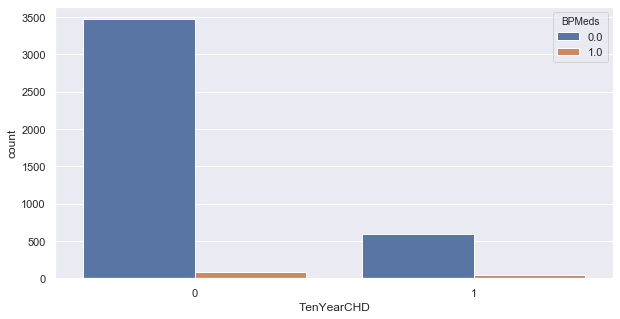

In [56]:
#Viewing the same graphically to determine if mode imputation is required
ax = sns.countplot(x="TenYearCHD", hue="BPMeds", data=df)

In [57]:
#performing mode imputation for BPMeds
df["BPMeds"].replace(np.nan, 0, inplace = True)

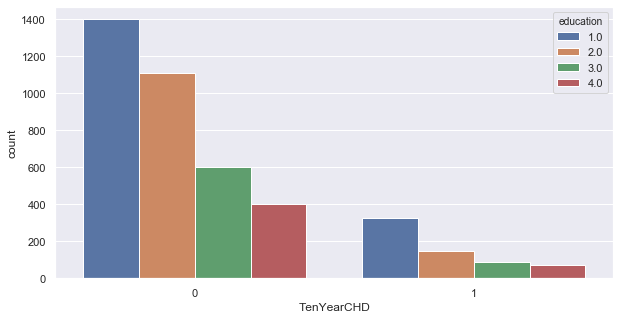

In [58]:
#Education is a categorical field that we can mode impute based on frequency
#Viewing the same graphically to determine if mode imputation is required
ax = sns.countplot(x="TenYearCHD", hue="education", data=df)

In [59]:
#performing mode imputation for BPMeds
df["education"].replace(np.nan, 1.0, inplace = True)

In [60]:
df.isnull().sum()

totChol            0
glucose            0
sysBP              0
diaBP              0
heartRate          0
age                0
cigsPerDay         0
BMI                0
male               0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
dtype: int64

In [61]:
#Replacing Education with known categories
df["education"].replace(1, "Some High School", inplace = True)
df["education"].replace(2, "High School", inplace = True)
df["education"].replace(3, "Some College", inplace = True)
df["education"].replace(4, "College", inplace = True)

#### No more nulls present. Missing value imputation completed

#### 5. Find Outlier

In [62]:
#checking for outliers manually
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

totChol      glucose        sysBP        diaBP    heartRate  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean    236.765943    81.966622   132.352407    82.893464    75.879179   
std      44.353645    22.881930    22.038097    11.910850    12.025189   
min     107.000000    40.000000    83.500000    48.000000    44.000000   
25%     206.000000    72.000000   117.000000    75.000000    68.000000   
50%     234.000000    78.540443   128.000000    82.000000    75.000000   
75%     263.000000    86.000000   144.000000    89.875000    83.000000   
90%     292.000000    97.000000   162.000000    98.000000    92.000000   
95%     312.000000   107.000000   175.000000   104.575000    98.000000   
99%     353.630000   170.000000   200.000000   118.000000   110.000000   
max     696.000000   394.000000   295.000000   142.500000   143.000000   

               age   cigsPerDay          BMI         male  currentSmoker  \
count  4238.000000  4238.000000  4238.000000  4238.000000    4238.000000   
mean     49.584946     9.004417    25.801461     0.429212       0.494101   
std       8.572160    11.880387     4.073158     0.495022       0.500024   
min      32.000000     0.000000    15.540000     0.000000       0.000000   
25%      42.000000     0.000000    23.070000     0.000000       0.000000   
50%      49.000000     0.000000    25.400000     0.000000       0.000000   
75%      56.000000    20.000000    28.040000     1.000000       1.000000   
90%      62.000000    25.000000    30.770000     1.000000       1.000000   
95%      64.000000    30.000000    32.771500     1.000000       1.000000   
99%      67.000000    43.000000    38.952600     1.000000       1.000000   
max      70.000000    70.000000    56.800000     1.000000       1.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes   TenYearCHD  
count  4238.000000      4238.000000   4238.000000  4238.000000  4238.000000  
mean      0.029259         0.005899      0.310524     0.025720     0.151958  
std       0.168552         0.076587      0.462763     0.158316     0.359023  
min       0.000000         0.000000      0.000000     0.000000     0.000000  
25%       0.000000         0.000000      0.000000     0.000000     0.000000  
50%       0.000000         0.000000      0.000000     0.000000     0.000000  
75%       0.000000         0.000000      1.000000     0.000000     0.000000  
90%       0.000000         0.000000      1.000000     0.000000     1.000000  
95%       0.000000         0.000000      1.000000     0.000000     1.000000  
99%       1.000000         0.000000      1.000000     1.000000     1.000000  
max       1.000000         1.000000      1.000000     1.000000     1.000000

In [63]:
#In order to further use the data in outlier detection convert object fields to numerical
def labelEncoder(data, columns):
    d1 = data.copy()
    for i in columns:
        le = LabelEncoder()
        d1[i] = le.fit_transform(d1[i])
    return d1
#except Exception as exp:
#self.errObj = ErrorHandler()
#err = self.errObj.handleErr(str(exp))
df_encoded=labelEncoder(df,columns=['education'])

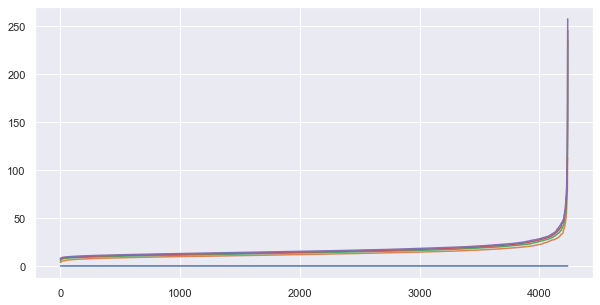

In [64]:
#Outlier detection using DBSCAN

def findDBScanEPS(data, n_neighbors):
    nn = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = nn.fit(data)
    distances, indices = nbrs.kneighbors(data)

    distances = np.sort(distances, axis=0)
    #distances = distances[:, 1]
    plt.plot(distances)
findDBScanEPS(df_encoded, 5)

Estimated number of clusters: 25
Estimated number of noise points: 150


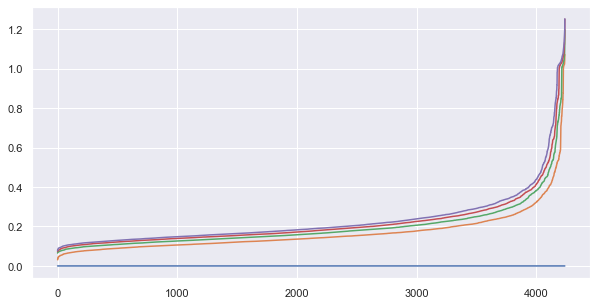

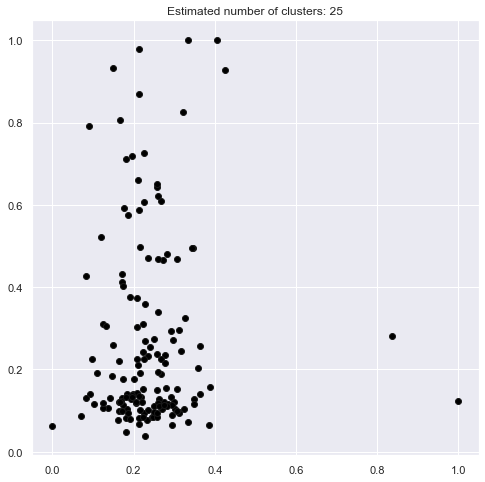

[37,
 44,
 96,
 138,
 161,
 247,
 249,
 255,
 260,
 284,
 294,
 311,
 357,
 443,
 471,
 475,
 481,
 646,
 660,
 738,
 763,
 786,
 833,
 864,
 952,
 976,
 1022,
 1030,
 1044,
 1068,
 1111,
 1165,
 1238,
 1303,
 1340,
 1363,
 1485,
 1521,
 1553,
 1589,
 1624,
 1649,
 1674,
 1808,
 1854,
 1856,
 1895,
 1931,
 1975,
 1994,
 1997,
 2007,
 2036,
 2041,
 2091,
 2098,
 2174,
 2180,
 2187,
 2204,
 2217,
 2234,
 2299,
 2378,
 2406,
 2461,
 2471,
 2492,
 2498,
 2503,
 2528,
 2560,
 2600,
 2617,
 2645,
 2657,
 2668,
 2682,
 2733,
 2755,
 2756,
 2784,
 2796,
 2801,
 2802,
 2849,
 2882,
 2893,
 2909,
 2926,
 2930,
 2961,
 2983,
 3002,
 3008,
 3088,
 3112,
 3136,
 3140,
 3160,
 3203,
 3242,
 3256,
 3314,
 3321,
 3327,
 3402,
 3449,
 3458,
 3489,
 3493,
 3505,
 3540,
 3552,
 3554,
 3604,
 3671,
 3675,
 3680,
 3682,
 3721,
 3741,
 3749,
 3793,
 3797,
 3809,
 3817,
 3839,
 3844,
 3846,
 3849,
 3862,
 3868,
 3875,
 3927,
 3928,
 3952,
 3971,
 4029,
 4035,
 4042,
 4057,
 4064,
 4076,
 4096,
 4154,
 4194,


In [65]:
def DBScanOutlier(data): # DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#try:
# dataNumeric = data.drop(nonNumeric, axis=1)
    d1 = data.copy()
#d1 = pd.get_dummies(d1[numericCols])

    scaler = MinMaxScaler()
    d2 = scaler.fit_transform(d1)
    d2 = pd.DataFrame(d2, columns=d1.columns)

    findDBScanEPS(d2, 5)
# epsfloat, default=0.5
# The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN
# parameter to choose appropriately for your data set and distance function.
# min_samplesint, default=5
# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
# This includes the point itself.

    db = DBSCAN(eps=0.5, min_samples=5).fit(d2)

    from sklearn import metrics
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
# detectedCluster = DBSCAN(eps=3.0, metric='euclidean', min_samples=10, n_jobs=-1)
# clusters = detectedCluster.fit_predict(d2)
# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(len(d2), labels))
#print("Completeness: %0.3f" % metrics.completeness_score(len(d2), labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(len(d2), labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(len(d2), labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(len(d2), labels))
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(d2, labels))

# Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(8, 8))
    for k, col in zip(unique_labels, colors):
        if k == -1:
# Black used for noise.
            col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = d2[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = d2[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

#cmap = cm.get_cmap('Set1')
#d2.plot.scatter(x='avgDeathsPerYear', y='avgAnnCount', c=clusters, cmap=cmap, colorbar=False)
#plt.close()
    outlierRow = []
    for i in range(len(labels)):
        if (labels[i] == -1):
#print(list((i, labels[i])))
            outlierRow.append(i)

    return outlierRow

#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))


DBScanOutlier(df_encoded)


#### During modeling we will run the model with and without outliers

In [66]:
#Scaling the data for outlier visualization
def minMaxScaler(data):
    scaler = MinMaxScaler()
    scaledData = scaler.fit_transform(data)
    scaledData = pd.DataFrame(scaledData, columns=data.columns)
    return scaledData

scaledData=minMaxScaler(df_encoded)


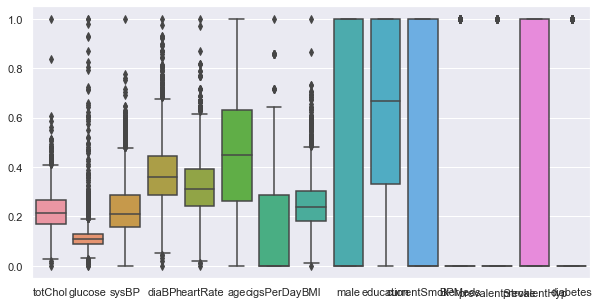

In [67]:
#Visualizing the outliers
def visualizeOutlier(scaledData):
# dataNumeric = data.drop(nonNumeric, axis=1)
    sns.boxplot(data=scaledData.iloc[:,0:15])

visualizeOutlier(scaledData)

#### 5. Single Variate

In [68]:
df.male.value_counts(dropna=False)

0    2419
1    1819
Name: male, dtype: int64

In [69]:
df.currentSmoker.value_counts(dropna=False)

0    2144
1    2094
Name: currentSmoker, dtype: int64

In [70]:
df.prevalentStroke.value_counts(dropna=False)

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [71]:
df.prevalentHyp.value_counts(dropna=False)

0    2922
1    1316
Name: prevalentHyp, dtype: int64

In [72]:
df.diabetes.value_counts(dropna=False)

0    4129
1     109
Name: diabetes, dtype: int64

#### 6. Multi Variate

In [73]:
#Correlation and Will do this with logistic regression later

#### 7. Perform feature engineering

In [74]:
#Performing correlation analysis for numerical fields
def correlation(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j] >=threshold) and (corr_matrix.columns[j] not in corr_col):
                colname = corr_matrix.columns[i]
                corr_col.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
                    
    print(corr_col)
    return corr_col
    
#corr_col = correlation(df,0.9)
corr_col = correlation(df_numeric,0.9)

#We observe that there are no fields with correlarion > 90% hence not dropping any fields
#regression

set()


In [75]:
#If we had a set of fieldsfrom above, then we need to delete these columns from df

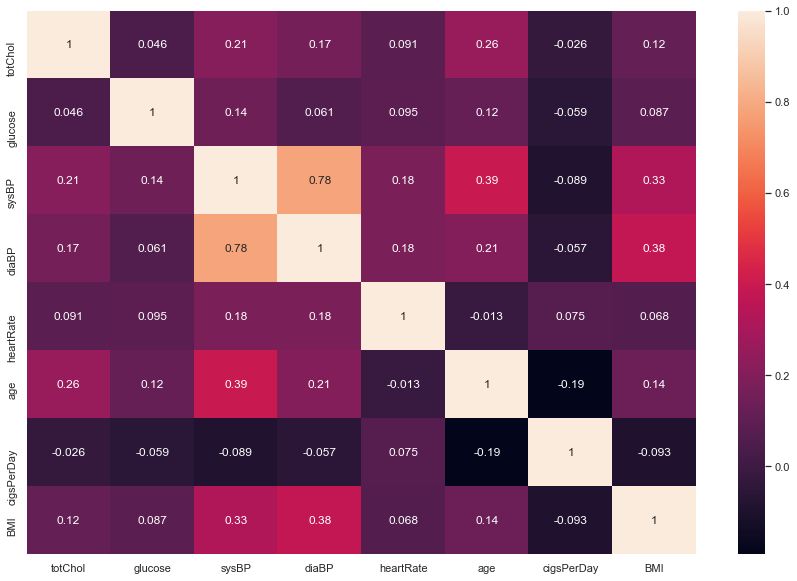

In [76]:
plt.figure(figsize=(15, 10))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [77]:
#Identifying catergorical fields (chi-square)
df_categorical

education  male  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
0           4.0     1              0     0.0                0             0   
1           2.0     0              0     0.0                0             0   
2           1.0     1              1     0.0                0             0   
3           3.0     0              1     0.0                0             1   
4           3.0     0              1     0.0                0             0   
...         ...   ...            ...     ...              ...           ...   
4233        1.0     1              1     0.0                0             1   
4234        3.0     1              1     0.0                0             0   
4235        2.0     0              1     NaN                0             0   
4236        1.0     0              1     0.0                0             0   
4237        2.0     0              0     0.0                0             0   

      diabetes  TenYearCHD  
0            0           0  
1            0           0  
2            0           0  
3            0           1  
4            0           0  
...        ...         ...  
4233         0           1  
4234         0           0  
4235         0           0  
4236         0           0  
4237         0           0  

[4238 rows x 8 columns]

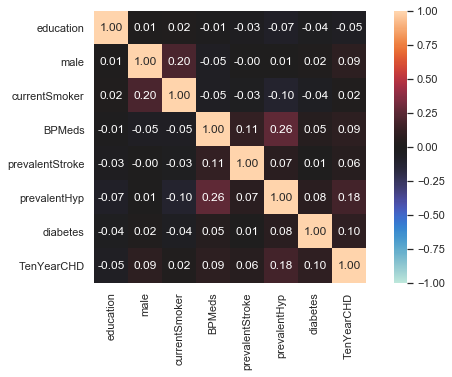

{'corr':                  education      male  currentSmoker    BPMeds  \
 education         1.000000  0.009271       0.020058 -0.009721   
 male              0.009271  1.000000       0.197596 -0.051545   
 currentSmoker     0.020058  0.197596       1.000000 -0.048358   
 BPMeds           -0.009721 -0.051545      -0.048358  1.000000   
 prevalentStroke  -0.029991 -0.004546      -0.032988  0.114609   
 prevalentHyp     -0.074963  0.005313      -0.103260  0.258697   
 diabetes         -0.037320  0.015708      -0.044295  0.051394   
 TenYearCHD       -0.051109  0.088428       0.019456  0.086417   
 
                  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  
 education              -0.029991     -0.074963 -0.037320   -0.051109  
 male                   -0.004546      0.005313  0.015708    0.088428  
 currentSmoker          -0.032988     -0.103260 -0.044295    0.019456  
 BPMeds                  0.114609      0.258697  0.051394    0.086417  
 prevalentStroke         1.000000   

In [78]:
#Performing correlation on catergorical fields
associations(df_categorical)
#We observe that none of the fields are correlated > 90% hence not dropping any fields
#Alternative visual
#associations(df_categorical, theil_u=True, figsize=(15, 15))

###### Neither of the attributes are highly correlated hence no requirement to drop any attributes

In [79]:
#Binning the data for all numeric columns
def createBin(data, numericCols, binNumber=4):
    d1 = data.copy()
    for i in numericCols[1:len(numericCols)]:
        bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
        d1[i + "Bin"] = pd.cut(d1[i], bins, precision=1, include_lowest=True, right=True)
#d1['PctWhiteBin'] = d1.PctWhiteBin.astype('category')

# d1['PctWhiteBin'] = pd.cut(d1.PctWhite / 100, bins, include_lowest=True, right=True)
    return d1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

df_bin=createBin(df, numericCols, binNumber=4)
#look at distribution of data in the bins and accordingly change the bin size. Here we can use bin size 10 and iterate model
#do binning for all numeric columns not categorical (covert to pct). 
df_bin

totChol     glucose  sysBP  diaBP  heartRate   age  cigsPerDay    BMI  \
0       195.0   77.000000  106.0   70.0       80.0  39.0         0.0  26.97   
1       250.0   76.000000  121.0   81.0       95.0  46.0         0.0  28.73   
2       245.0   70.000000  127.5   80.0       75.0  48.0        20.0  25.34   
3       225.0  103.000000  150.0   95.0       65.0  61.0        30.0  28.58   
4       285.0   85.000000  130.0   84.0       85.0  46.0        23.0  23.10   
...       ...         ...    ...    ...        ...   ...         ...    ...   
4233    313.0   86.000000  179.0   92.0       66.0  50.0         1.0  25.97   
4234    207.0   68.000000  126.5   80.0       65.0  51.0        43.0  19.71   
4235    248.0   86.000000  131.0   72.0       84.0  48.0        20.0  22.00   
4236    210.0   77.503029  126.5   87.0       86.0  44.0        15.0  19.16   
4237    269.0  107.000000  133.5   83.0       80.0  52.0         0.0  21.47   

      male         education  ...  prevalentHyp  diabetes  TenYearCHD  \
0        1           College  ...             0         0           0   
1        0       High School  ...             0         0           0   
2        1  Some High School  ...             0         0           0   
3        0      Some College  ...             1         0           1   
4        0      Some College  ...             0         0           0   
...    ...               ...  ...           ...       ...         ...   
4233     1  Some High School  ...             1         0           1   
4234     1      Some College  ...             0         0           0   
4235     0       High School  ...             0         0           0   
4236     0  Some High School  ...             0         0           0   
4237     0       High School  ...             0         0           0   

         glucoseBin        sysBPBin       diaBPBin   heartRateBin  \
0     (39.9, 158.0]   (83.4, 154.0]   (47.9, 79.5]  (77.0, 110.0]   
1     (39.9, 158.0]   (83.4, 154.0]  (79.5, 111.0]  (77.0, 110.0]   
2     (39.9, 158.0]   (83.4, 154.0]  (79.5, 111.0]   (43.9, 77.0]   
3     (39.9, 158.0]   (83.4, 154.0]  (79.5, 111.0]   (43.9, 77.0]   
4     (39.9, 158.0]   (83.4, 154.0]  (79.5, 111.0]  (77.0, 110.0]   
...             ...             ...            ...            ...   
4233  (39.9, 158.0]  (154.0, 224.5]  (79.5, 111.0]   (43.9, 77.0]   
4234  (39.9, 158.0]   (83.4, 154.0]  (79.5, 111.0]   (43.9, 77.0]   
4235  (39.9, 158.0]   (83.4, 154.0]   (47.9, 79.5]  (77.0, 110.0]   
4236  (39.9, 158.0]   (83.4, 154.0]  (79.5, 111.0]  (77.0, 110.0]   
4237  (39.9, 158.0]   (83.4, 154.0]  (79.5, 111.0]  (77.0, 110.0]   

            ageBin cigsPerDayBin        BMIBin  
0     (31.9, 44.7]  (-0.1, 23.3]  (15.4, 29.3]  
1     (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]  
2     (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]  
3     (57.3, 70.0]  (23.3, 46.7]  (15.4, 29.3]  
4     (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]  
...            ...           ...           ...  
4233  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]  
4234  (44.7, 57.3]  (23.3, 46.7]  (15.4, 29.3]  
4235  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]  
4236  (31.9, 44.7]  (-0.1, 23.3]  (15.4, 29.3]  
4237  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]  

[4238 rows x 23 columns]

In [81]:
#Getting percentage distribution of all categorical fields
def createCategoryPct(data, categoricalCols):
    d1 = data.copy()
    length = len(d1)
    for i in categoricalCols[1:len(categoricalCols)]:
        d1[i + 'Pct'] = (d1[i].groupby(d1[i]).transform('count'))*100/length
#d1[i + 'Pct'] = round(d1[i + 'Pct'],2)
#bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
#d1[i + "Bin"] = pd.cut(d1[i], bins, include_lowest=True, right=True)
    return d1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))
df_pct=createCategoryPct(df, categoricalCols)

#df_pct.drop(['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'],inplace=True,axis = 1)
cols = df_pct.columns.difference(df_bin.columns)
df_bin_pct=pd.concat([df_bin, df_pct[cols]], axis=1)
#df=pd.concat([df_bin, df_pct], axis=1)
#use max col width to get bin columns

In [82]:
#Displaying combined attributes including binning and percentage. Drop the target variale converted to percentage
pd.set_option("display.max_columns", 100)
df_bin_pct.drop(['TenYearCHDPct'],inplace=True,axis = 1)
df_bin_pct
#Use one hot encoding to identify influencial bins. Use 10 bins here for modelling

totChol     glucose  sysBP  diaBP  heartRate   age  cigsPerDay    BMI  \
0       195.0   77.000000  106.0   70.0       80.0  39.0         0.0  26.97   
1       250.0   76.000000  121.0   81.0       95.0  46.0         0.0  28.73   
2       245.0   70.000000  127.5   80.0       75.0  48.0        20.0  25.34   
3       225.0  103.000000  150.0   95.0       65.0  61.0        30.0  28.58   
4       285.0   85.000000  130.0   84.0       85.0  46.0        23.0  23.10   
...       ...         ...    ...    ...        ...   ...         ...    ...   
4233    313.0   86.000000  179.0   92.0       66.0  50.0         1.0  25.97   
4234    207.0   68.000000  126.5   80.0       65.0  51.0        43.0  19.71   
4235    248.0   86.000000  131.0   72.0       84.0  48.0        20.0  22.00   
4236    210.0   77.503029  126.5   87.0       86.0  44.0        15.0  19.16   
4237    269.0  107.000000  133.5   83.0       80.0  52.0         0.0  21.47   

      male         education  currentSmoker  BPMeds  prevalentStroke  \
0        1           College              0     0.0                0   
1        0       High School              0     0.0                0   
2        1  Some High School              1     0.0                0   
3        0      Some College              1     0.0                0   
4        0      Some College              1     0.0                0   
...    ...               ...            ...     ...              ...   
4233     1  Some High School              1     0.0                0   
4234     1      Some College              1     0.0                0   
4235     0       High School              1     0.0                0   
4236     0  Some High School              1     0.0                0   
4237     0       High School              0     0.0                0   

      prevalentHyp  diabetes  TenYearCHD     glucoseBin        sysBPBin  \
0                0         0           0  (39.9, 158.0]   (83.4, 154.0]   
1                0         0           0  (39.9, 158.0]   (83.4, 154.0]   
2                0         0           0  (39.9, 158.0]   (83.4, 154.0]   
3                1         0           1  (39.9, 158.0]   (83.4, 154.0]   
4                0         0           0  (39.9, 158.0]   (83.4, 154.0]   
...            ...       ...         ...            ...             ...   
4233             1         0           1  (39.9, 158.0]  (154.0, 224.5]   
4234             0         0           0  (39.9, 158.0]   (83.4, 154.0]   
4235             0         0           0  (39.9, 158.0]   (83.4, 154.0]   
4236             0         0           0  (39.9, 158.0]   (83.4, 154.0]   
4237             0         0           0  (39.9, 158.0]   (83.4, 154.0]   

           diaBPBin   heartRateBin        ageBin cigsPerDayBin        BMIBin  \
0      (47.9, 79.5]  (77.0, 110.0]  (31.9, 44.7]  (-0.1, 23.3]  (15.4, 29.3]   
1     (79.5, 111.0]  (77.0, 110.0]  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]   
2     (79.5, 111.0]   (43.9, 77.0]  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]   
3     (79.5, 111.0]   (43.9, 77.0]  (57.3, 70.0]  (23.3, 46.7]  (15.4, 29.3]   
4     (79.5, 111.0]  (77.0, 110.0]  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]   
...             ...            ...           ...           ...           ...   
4233  (79.5, 111.0]   (43.9, 77.0]  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]   
4234  (79.5, 111.0]   (43.9, 77.0]  (44.7, 57.3]  (23.3, 46.7]  (15.4, 29.3]   
4235   (47.9, 79.5]  (77.0, 110.0]  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]   
4236  (79.5, 111.0]  (77.0, 110.0]  (31.9, 44.7]  (-0.1, 23.3]  (15.4, 29.3]   
4237  (79.5, 111.0]  (77.0, 110.0]  (44.7, 57.3]  (-0.1, 23.3]  (15.4, 29.3]   

      BPMedsPct  currentSmokerPct  diabetesPct    malePct  prevalentHypPct  \
0     97.074092         50.589901    97.428032  42.921189        68.947617   
1     97.074092         50.589901    97.428032  57.078811        68.947617   
2     97.074092         49.410099    97.428032  42.921189        68.947617   
3     97.074092   

#### PCA

       PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0  0.104726 -0.068069 -0.861283  0.631604 -0.175055  0.024783  0.000235   
1 -0.513479 -0.499109 -0.187852  0.293244 -0.046418  0.003935  0.020168   
2  0.786812  0.050739 -0.159336 -0.435499 -0.008777 -0.004120 -0.034227   
3 -0.026387  0.374515  0.928027  0.010509  0.208989 -0.133288  0.044959   
4  0.270555 -0.515222  0.479564 -0.093157  0.005167  0.003597  0.007044   
5 -0.794420  0.362806  0.267747  0.467605 -0.275400 -0.043178  0.072524   
6 -0.618435 -0.361603 -0.180373 -0.420608  0.286085 -0.067122 -0.034999   
7  0.306617 -0.598413  0.440979  0.233055  0.035640 -0.013155  0.004699   
8 -0.297850  0.938443 -0.364182 -0.227156 -0.167419 -0.094814  0.024176   
9  0.550104  0.888869  0.326731 -0.255540 -0.312102 -0.038178  0.053864   

       PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0  0.010152 -0.103236 -0.053126  0.084914  0.006326 -0.037129  0.000538   
1  0.204443 -0.064148 -0

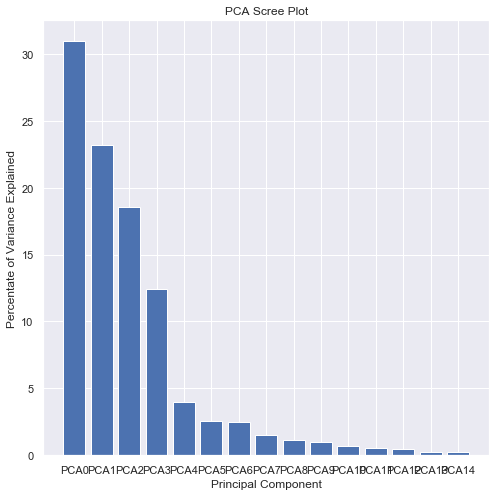

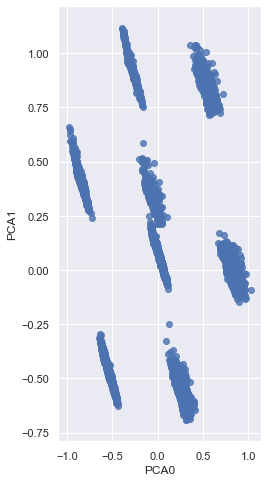

[0.30956667 0.23181316 0.18594812 0.12448452 0.04004294 0.02582303
 0.02464289 0.0149258  0.01115675 0.00974365 0.00698244 0.00554399
 0.00481836 0.00244675 0.00206094]
[0.30956667 0.54137982 0.72732795 0.85181247 0.89185541 0.91767844
 0.94232133 0.95724713 0.96840387 0.97814752 0.98512996 0.99067395
 0.99549231 0.99793906 1.        ]


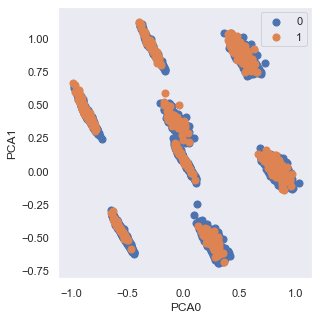

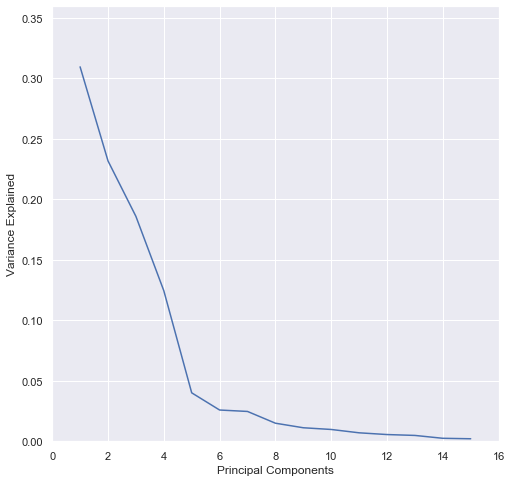

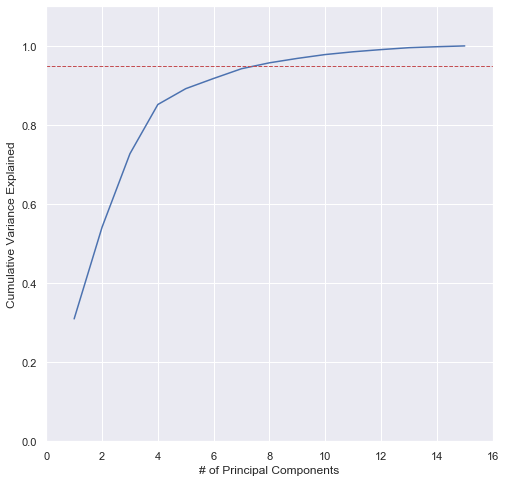

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0     0.104726 -0.068069 -0.861283  0.631604 -0.175055  0.024783  0.000235   
1    -0.513479 -0.499109 -0.187852  0.293244 -0.046418  0.003935  0.020168   
2     0.786812  0.050739 -0.159336 -0.435499 -0.008777 -0.004120 -0.034227   
3    -0.026387  0.374515  0.928027  0.010509  0.208989 -0.133288  0.044959   
4     0.270555 -0.515222  0.479564 -0.093157  0.005167  0.003597  0.007044   
...        ...       ...       ...       ...       ...       ...       ...   
4233  0.437378  0.898812  0.260196 -0.278493 -0.099033 -0.080962  0.019751   
4234  0.884295  0.020300 -0.136794 -0.122904  0.116673 -0.033779 -0.043532   
4235  0.289312 -0.565760  0.453963  0.223510  0.108565 -0.013990  0.011805   
4236  0.228672 -0.496076  0.476475 -0.406684 -0.109849  0.008796 -0.002716   
4237 -0.531139 -0.476055 -0.187928  0.275900  0.123560 -0.019110  0.010771   

          PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0     0.010152 -0.103236 -0.053126  0.084914  0.006326 -0.037129  0.000538   
1     0.204443 -0.064148 -0.016441  0.084069  0.002759  0.008950 -0.023812   
2     0.027733  0.016820 -0.008241 -0.011703 -0.006992  0.025948 -0.013131   
3    -0.084228  0.083603  0.222991  0.025632  0.002623 -0.070003  0.035163   
4     0.127074 -0.000842  0.071554 -0.052771 -0.006952  0.076105  0.009785   
...        ...       ...       ...       ...       ...       ...       ...   
4233 -0.124563  0.130724 -0.236267 -0.046582 -0.037215  0.141923  0.076484   
4234 -0.025008 -0.029027  0.313680 -0.150027  0.006263 -0.043427 -0.017618   
4235  0.050925 -0.074469  0.033995 -0.025723  0.000410  0.015734  0.046011   
4236  0.084059 -0.015396 -0.053001 -0.156109  0.004886 -0.026187 -0.024808   
4237  0.081030 -0.019967  0.007956 -0.097069 -0.006989  0.048104  0.064401   

         PCA14  TenYearCHD  
0    -0.015273           0  
1     0.005345           0  
2    -0.024603           0  
3     0.075437           1  
4     0.017226           0  
...        ...         ...  
4233 -0.095310           1  
4234 -0.006548           0  
4235 -0.041056           0  
4236  0.033718           0  
4237  0.034406           0  

[4238 rows x 16 columns]

In [83]:
response='TenYearCHD'

def scaleData(data):
            scaler = MinMaxScaler(feature_range=(0, 1))
            d2 = scaler.fit_transform(data)
            scaledData = pd.DataFrame(d2, columns=data.columns)
            return scaledData
        
def performPCA(data):
            pca = PCA()  # n_components=10
            # pca = SparsePCA()
            pcaModel = pca.fit(data)
            pcaTransformed = pd.DataFrame(pcaModel.transform(data), columns=range(data.shape[1]))
            for i in range(len(pcaTransformed.columns)):
                pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)
            print(pcaTransformed.head(10))
            comp = pd.DataFrame(pcaModel.components_, columns=data.columns)
            print(comp)
            return pca, pcaModel, pcaTransformed
        
        
def drawGraph(data, response, uniqueTarget):
            fig = plt.figure(figsize=(8, 8))
            plt.subplot(121)
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.8)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')
            plt.show()

            plt.subplot(122)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')

            colors = np.random.rand(len(uniqueTarget))

            # for target, color in zip(uniqueTarget, colors):
            for target in (uniqueTarget):
                indicesToKeep = data[response] == target
                plt.scatter(data.loc[indicesToKeep, 'PCA0']
                            , data.loc[indicesToKeep, 'PCA1']
                            # , c=color
                            , s=50)
            plt.legend(uniqueTarget)
            plt.grid()

def drawScreePlot(pca, columns):
            percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
            # columns = ['PC1', 'PC2', 'PC3', 'PC4']
            plt.figure(figsize=(8, 8))
            plt.bar(x=range(1, len(columns) + 1), height=percent_variance, tick_label=columns)
            plt.ylabel('Percentate of Variance Explained')
            plt.xlabel('Principal Component')
            plt.title('PCA Scree Plot')
            plt.show()


def showVariance(pcaModel, pca):
            print(pcaModel.explained_variance_ratio_)
            print(np.cumsum(pcaModel.explained_variance_ratio_))
            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), pca.explained_variance_ratio_)
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, max(pca.explained_variance_ratio_) + 0.05])
            # plt.xticks(list(range(1, len(pca.explained_variance_ratio_))))
            plt.xlabel('Principal Components')
            plt.ylabel('Variance Explained')
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, 1.1])
            plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
            # plt.xticks(list(range(1, 61)))
            plt.xlabel('# of Principal Components')
            plt.ylabel('Cumulative Variance Explained')
            plt.show()
            
def createPCA(data, response):
            targetDF = data[[response]]
            uniqueTarget = targetDF[response].unique()
            # d1 = data.drop(categoricalCols, axis=1)
            d1 = data.drop(response, axis=1)
            #d1 = pd.get_dummies(d1)
            # d1=data.copy()
            scaledData = scaleData(d1)

            pca, pcaModel, pcaTransformed = performPCA(scaledData)
            drawScreePlot(pca, pcaTransformed.columns)
            pcaTransformedResponse = pd.concat([pcaTransformed, targetDF], axis=1)
            pcaTransformedResponse

            drawGraph(pcaTransformedResponse, response, uniqueTarget)
            showVariance(pcaModel, pca)
            return pcaTransformedResponse

createPCA(df_encoded, response)

#We see from the graph below , after 5 components, the variance drops quickly. 
#from pcaTransformedResponse take only the first 7 PCA components for modeling iterations
#every feature is contributing to every component with varying degree
#we have set a threshold of 95% and here 8 components capture 95% of the variance in the data .. 

# DATA VISUALIZATION

1. Missing value (completed above)
2. Outlier (completed above)
3. PCA
4. Correlation (completed above)

Yet to do 
5. Regression Diagnostics
6. AUC


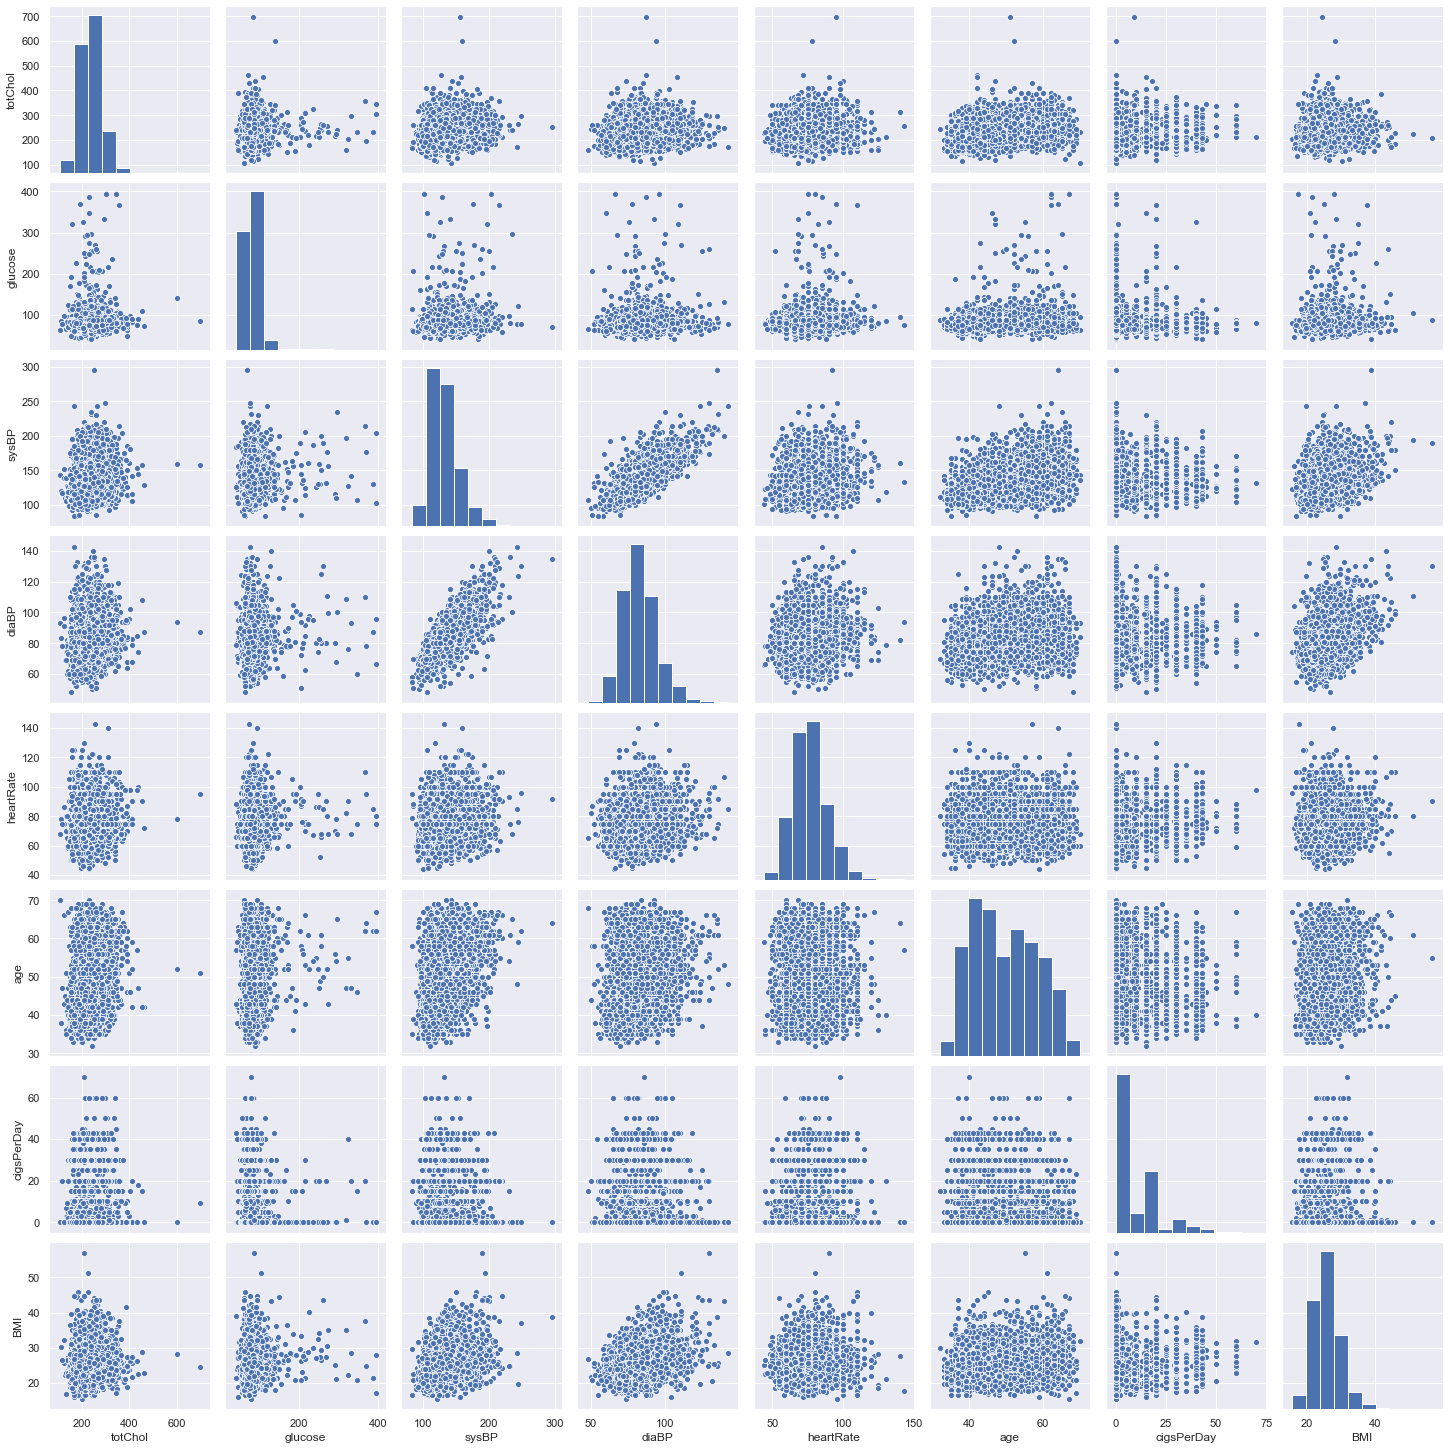

In [84]:
#sns.set_theme(style="ticks")
sns.pairplot(df_numeric)

#From below we see the highest correlation between diaBP and sysBP
#kernel density

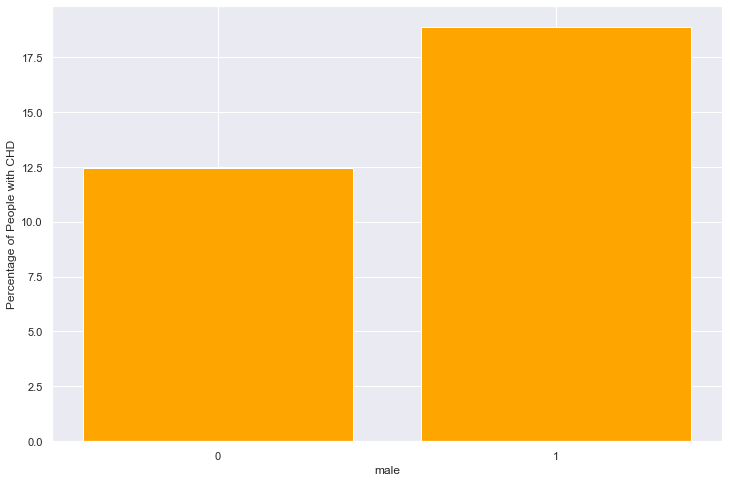

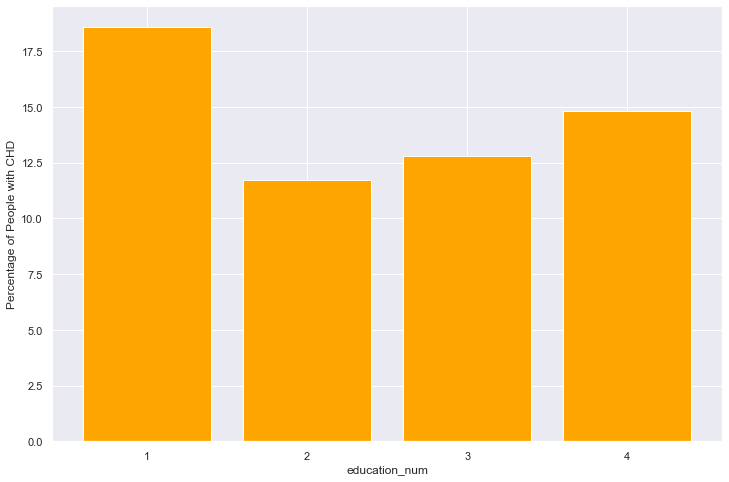

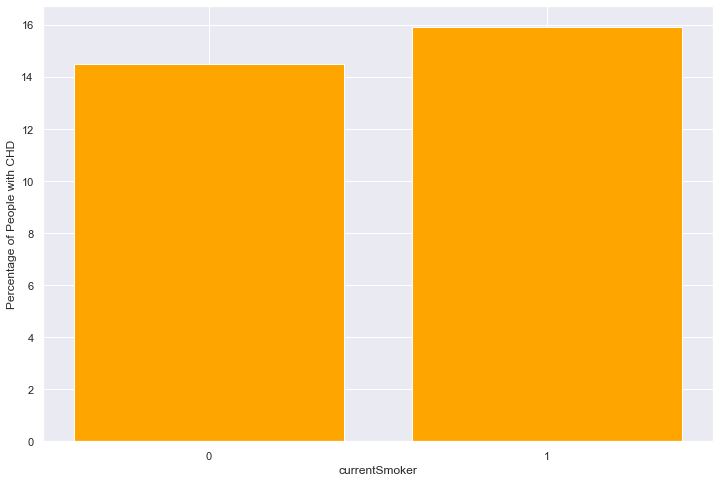

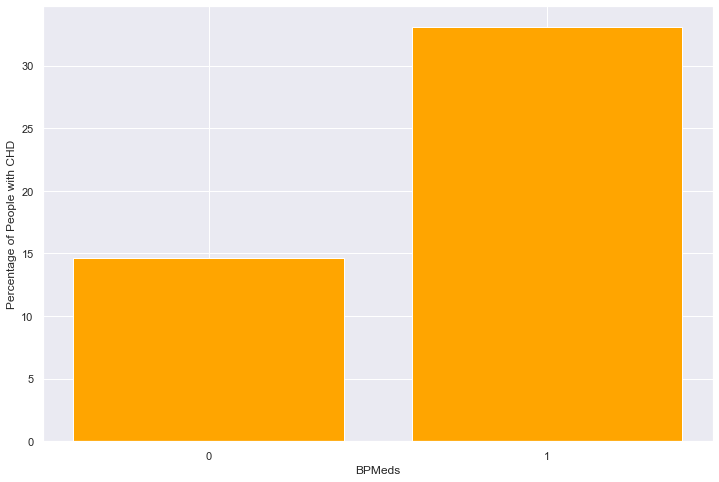

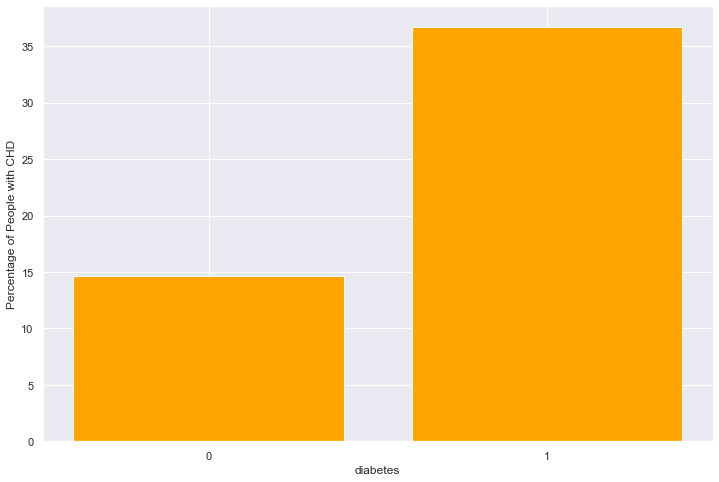

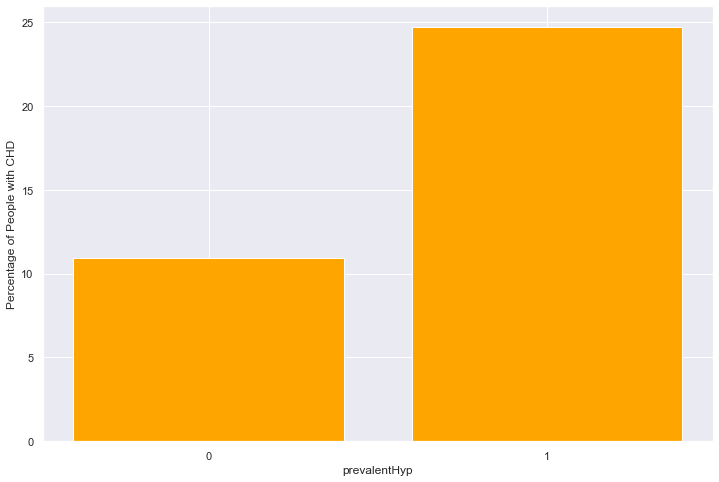

In [85]:
def percentageDistribution(data, percentCol, target):
            # cat col vs target
            fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
            distribution = data[percentCol].value_counts()
            percentColValue = [int(x) for x in sorted(distribution.index)] 
            targetCount = dict(map(lambda x: [x,0],percentColValue))
            
            for t,c in zip(data[target],data[percentCol]):
                targetCount[c] += t
                rates = [(targetCount[c] / float(distribution.loc[c]))*100 for c in percentColValue]
            
            x = np.arange(len(percentColValue))
            
            
            ax.bar(x,rates,color = 'Orange')
            ax.set_xticks(x)
            ax.set_xticklabels(percentColValue)
            ax.set_xlabel(percentCol)
            ax.set_ylabel('Percentage of People with CHD')
            
            plt.show()

# Create the dictionary 
event_dictionary ={'Some High School' : 1, 'High School' : 2, 'Some College' : 3, 'College' :4} 
# Add a new column named 'Price' 
df['education_num'] = df['education'].map(event_dictionary) 

percentageDistribution(df, percentCol='male', target='TenYearCHD')
percentageDistribution(df, percentCol='education_num', target='TenYearCHD')
percentageDistribution(df, percentCol='currentSmoker', target='TenYearCHD')
percentageDistribution(df, percentCol='BPMeds', target='TenYearCHD')
percentageDistribution(df, percentCol='diabetes', target='TenYearCHD')
percentageDistribution(df, percentCol='prevalentHyp', target='TenYearCHD')
#'currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'

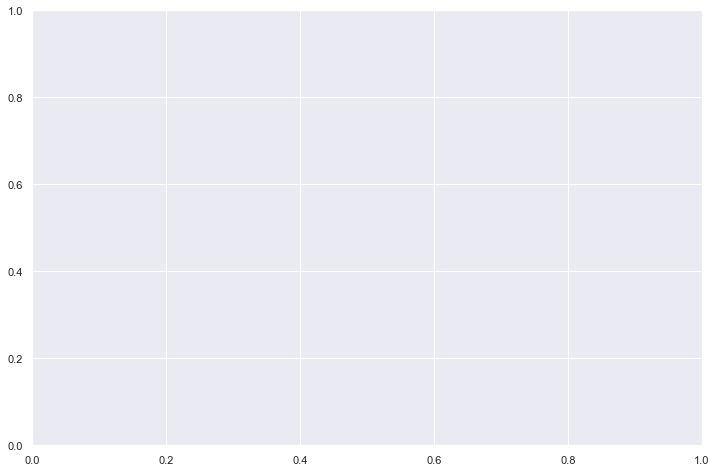

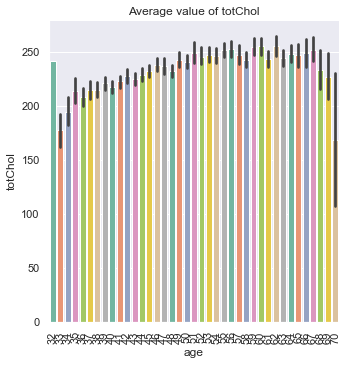

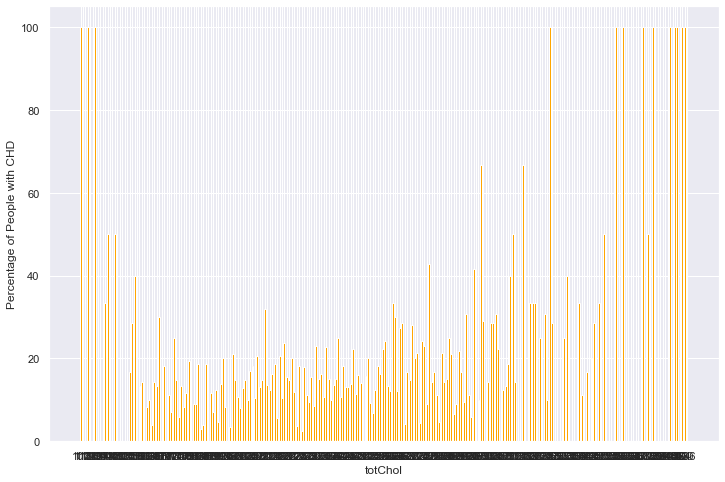

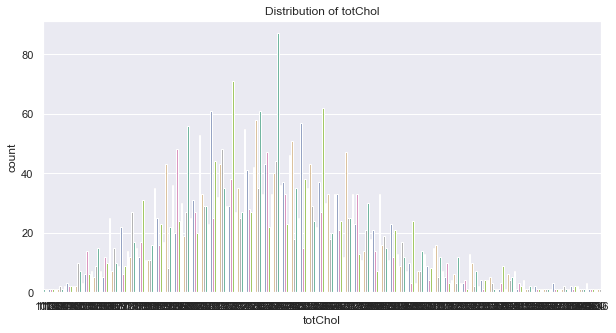

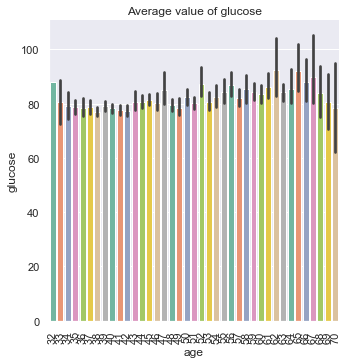

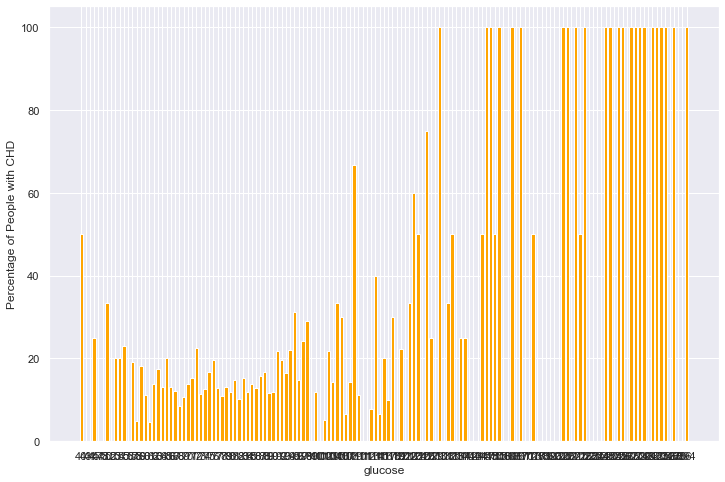

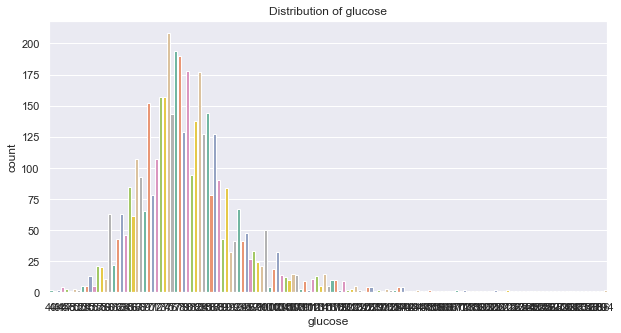

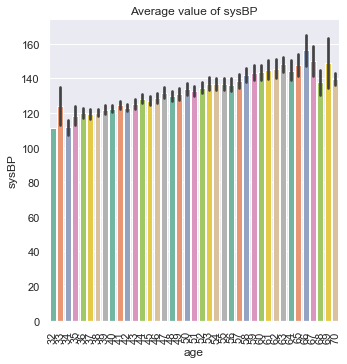

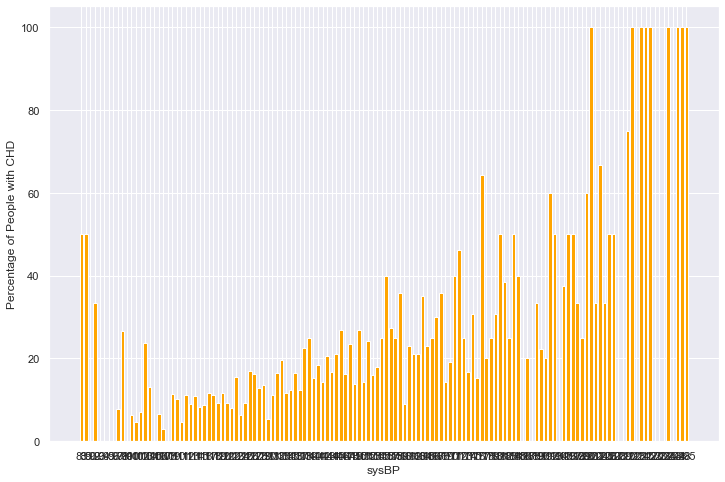

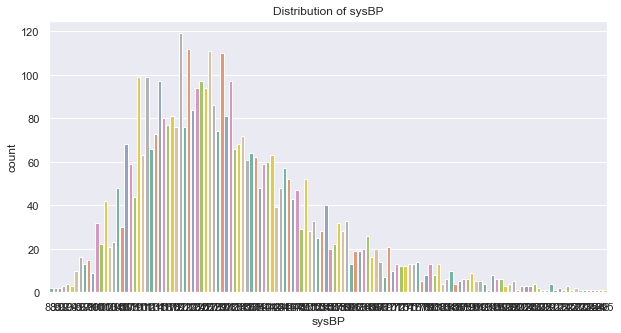

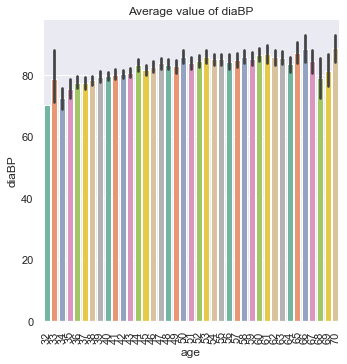

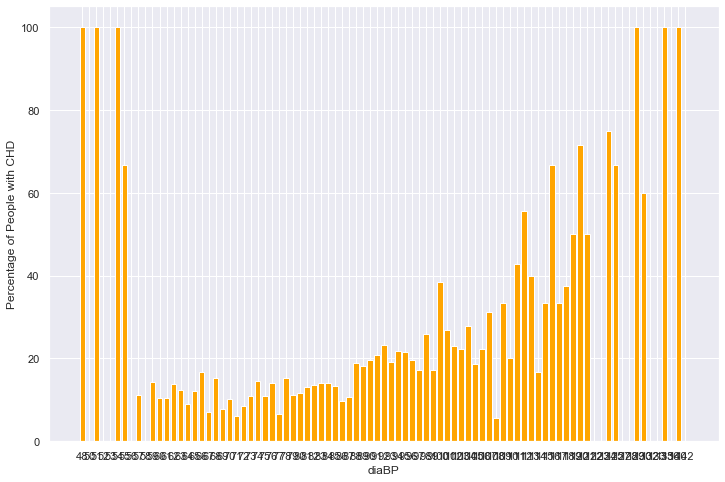

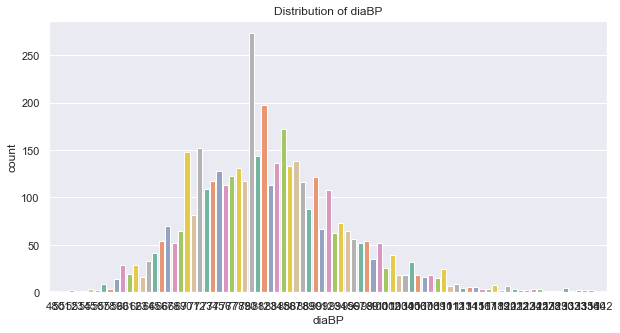

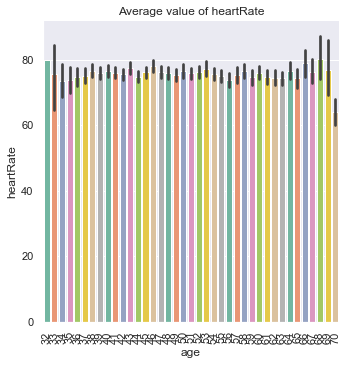

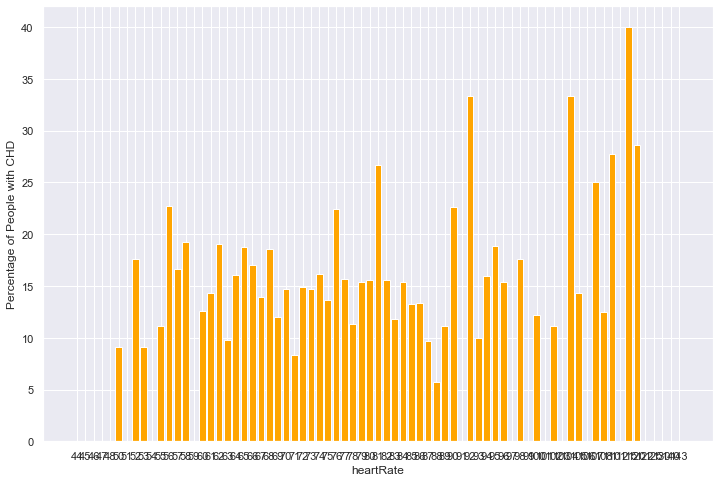

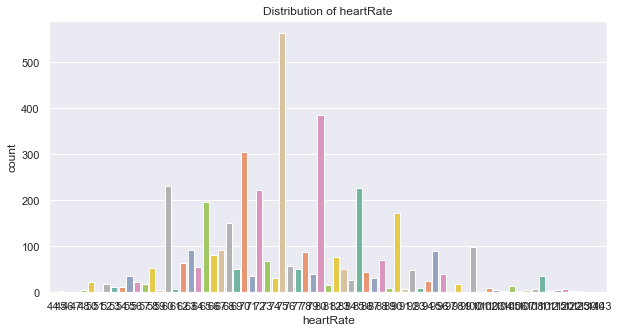

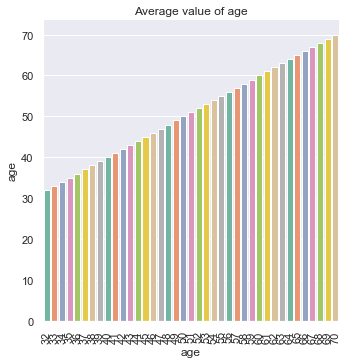

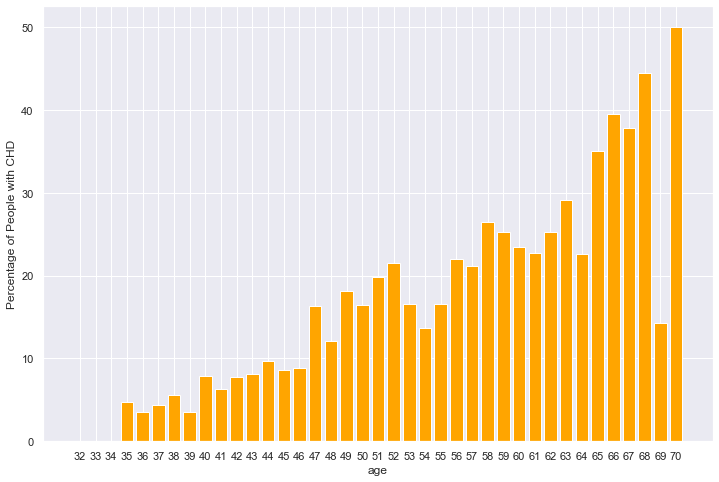

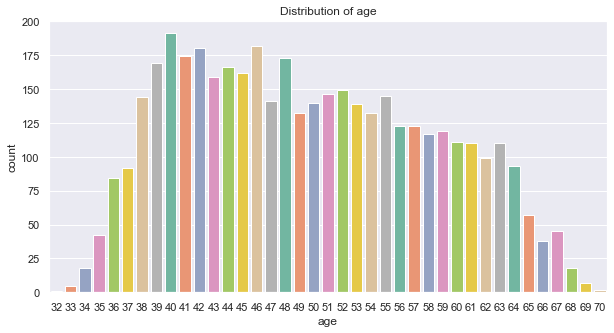

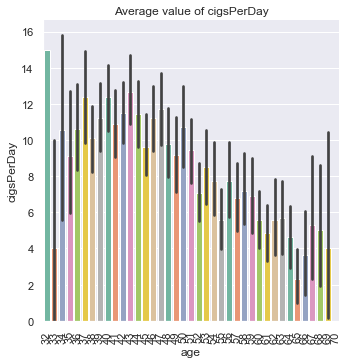

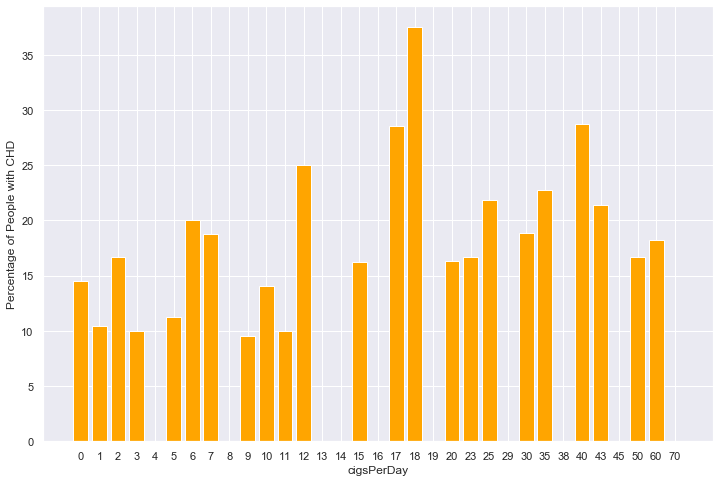

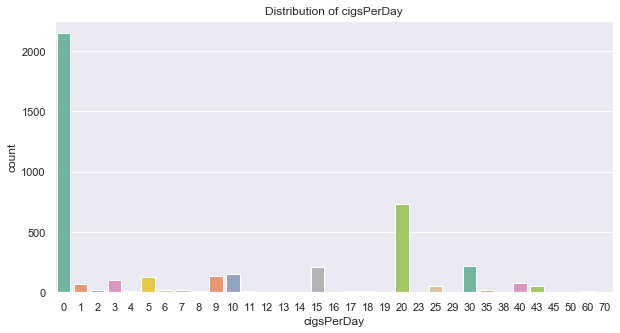

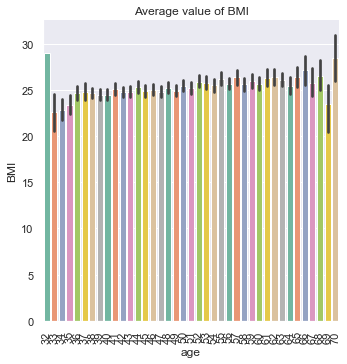

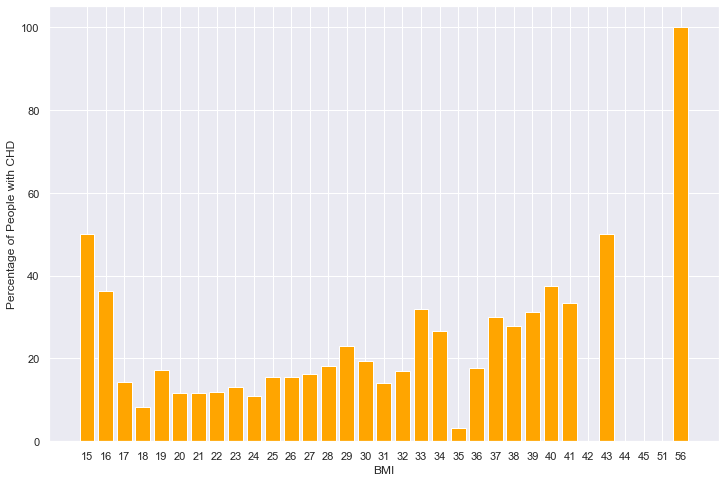

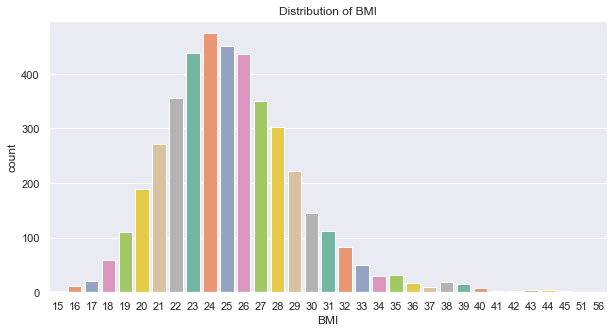

In [105]:
def plotSeries(data, seriesCols, response, xCol, dpi=100):
            #plt.figure(figsize=(16,8), dpi=dpi)
            fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
            #fig, axes = plt.subplots(nrows=round(len(seriesCols)/2)+1, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k")
            #x = data[xCol]
            #colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
            
            for i in range(len(seriesCols)):  
                #m = seriesCols[i]
                #y=data[m]
                #y.index = data[xCol]
                #c = colors[i % (len(colors))]
                
                sns.catplot( x=xCol, y=seriesCols[i], data=data, kind='bar', palette="Set2")
                plt.xticks(rotation=90)
                plt.title("Average value of " + seriesCols[i])
                plt.show()
                percentageDistribution(data, seriesCols[i], response)
                sns.countplot(x=seriesCols[i], data=data,
                                          palette="Set2")
                plt.title("Distribution of " + seriesCols[i])
                plt.show()
                #ax = y.plot(ax = axes[i // 2, i % 2],rot=25, color=c, title = 'Series plot of ' + m)
                #ax.set_ylabel(m)             
                #plt.show()
df.iloc[:,0:8] = df.iloc[:,0:8].astype(int) # float to int for processing numericalCols in graph
#plotSeries(df, numericCols, 'TenYearCHD', 'age', dpi=100)

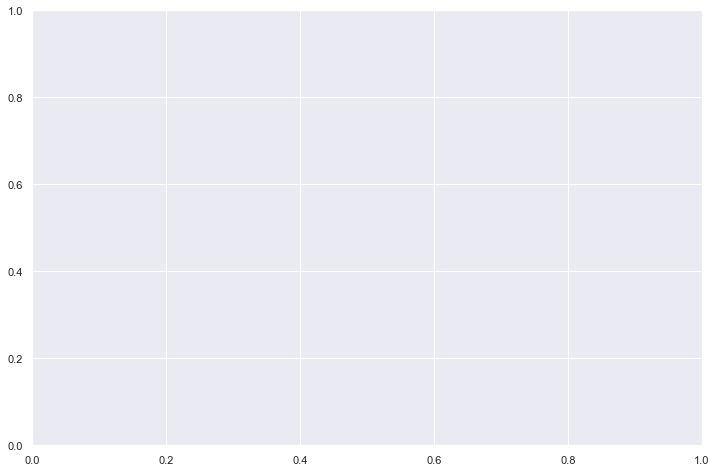

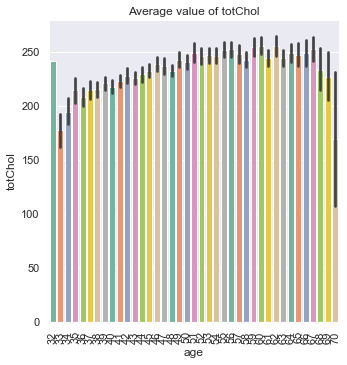

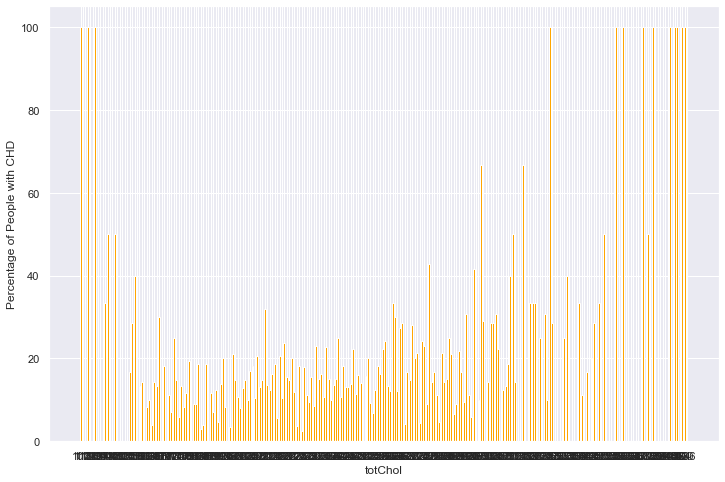

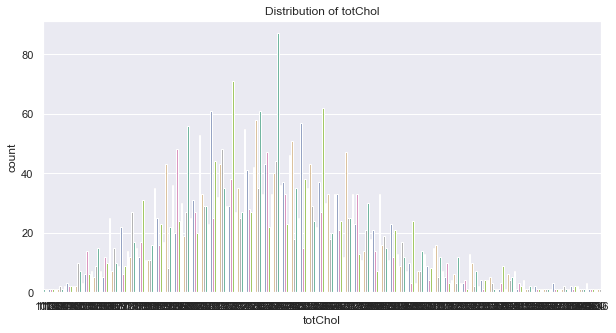

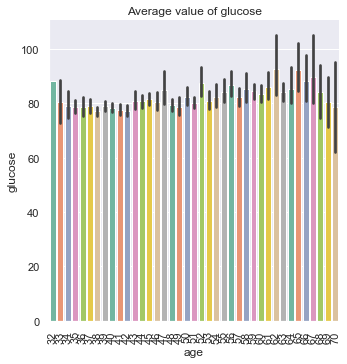

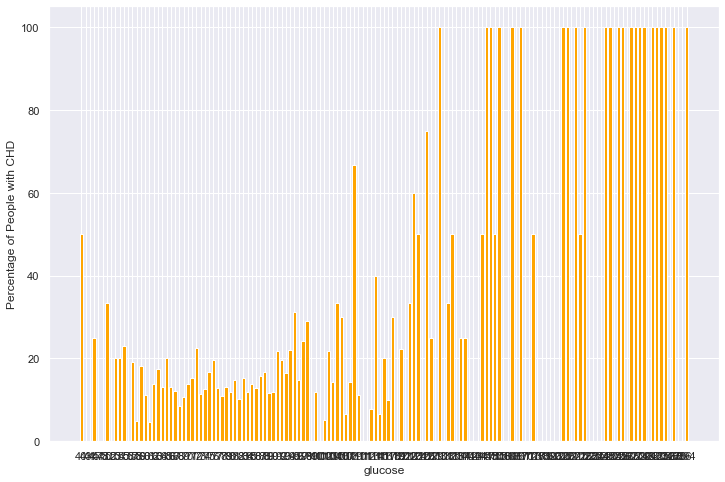

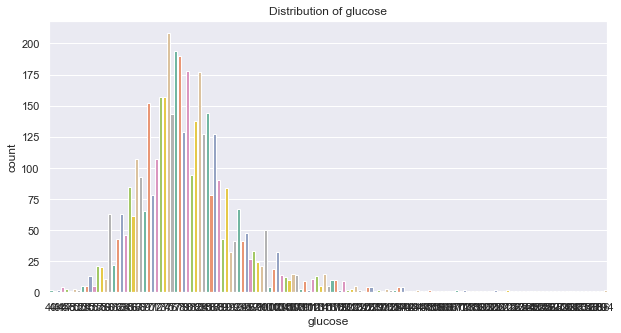

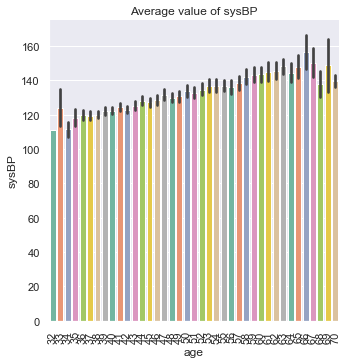

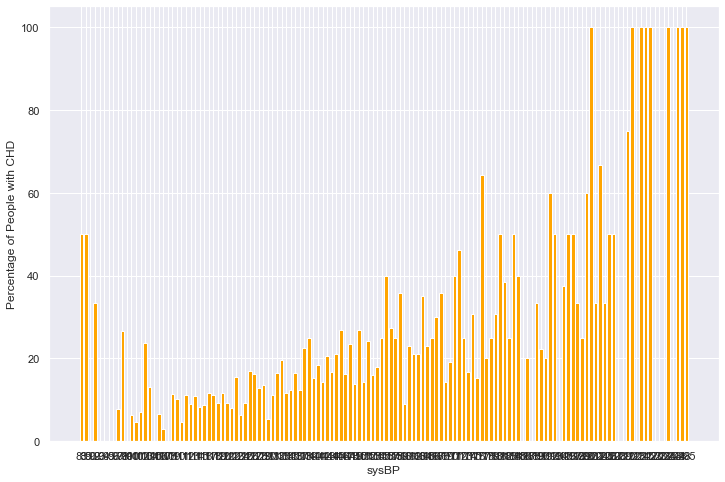

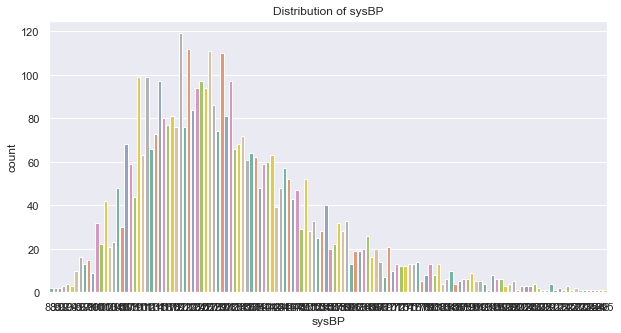

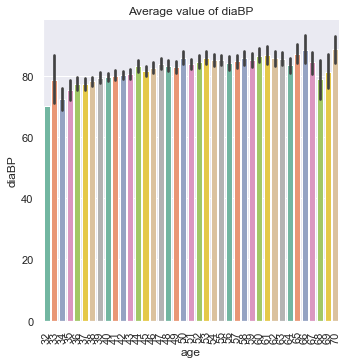

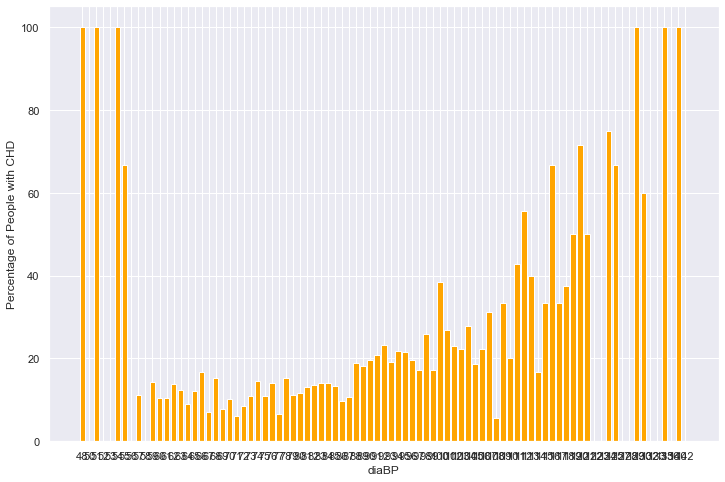

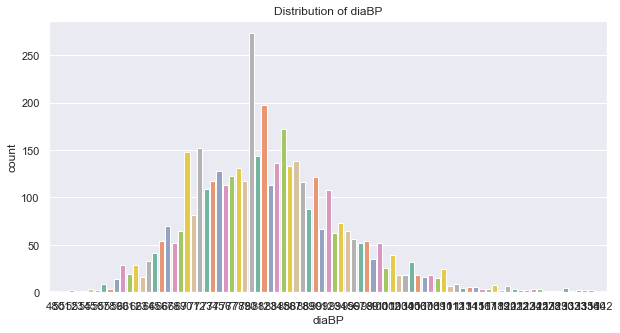

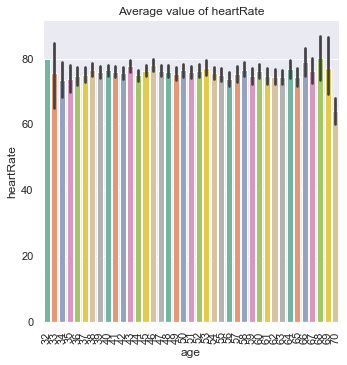

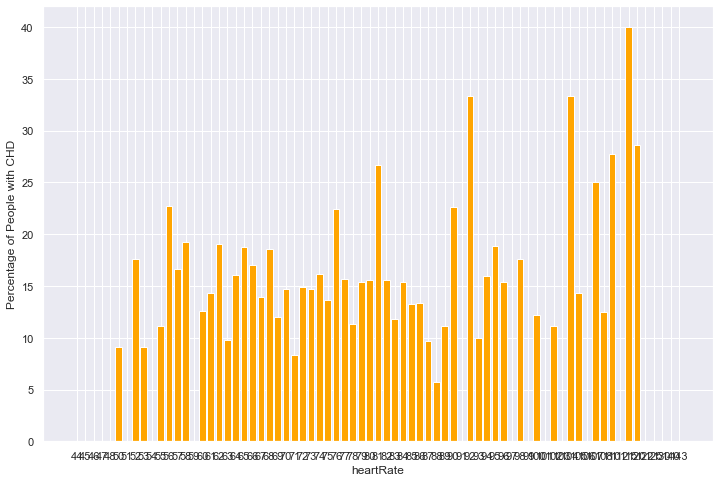

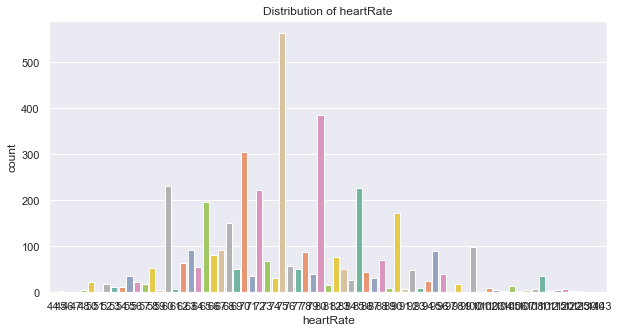

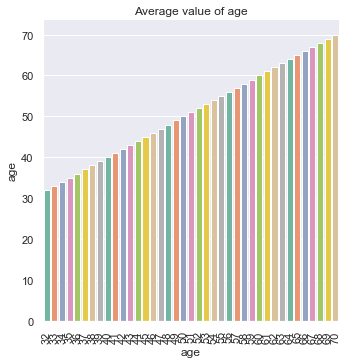

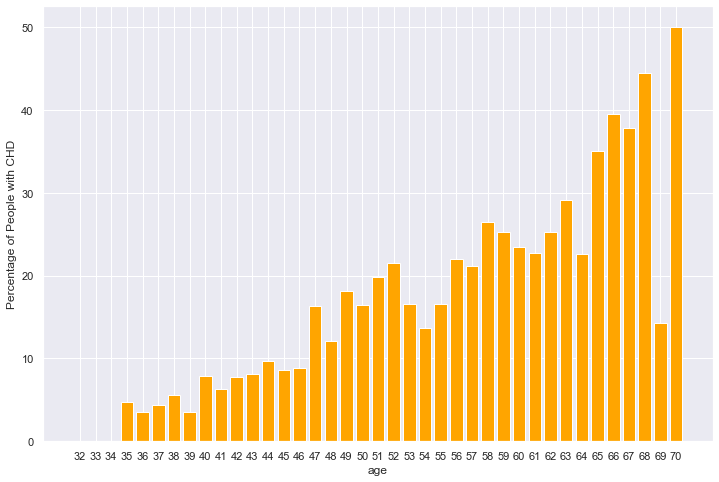

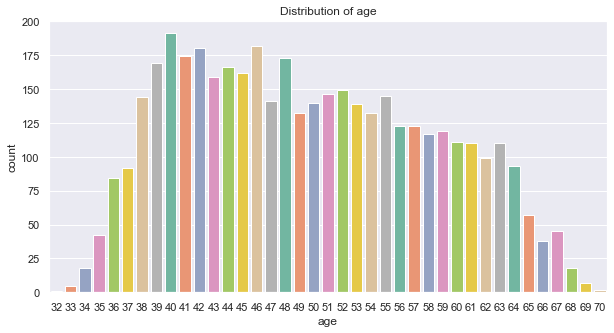

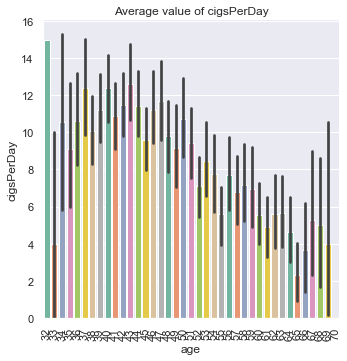

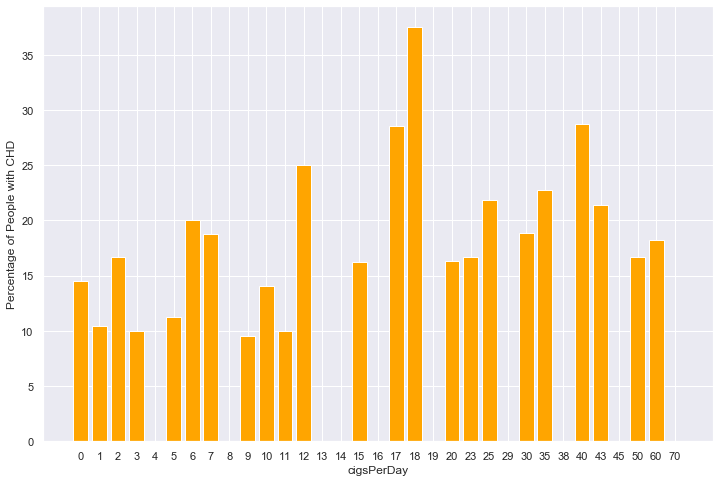

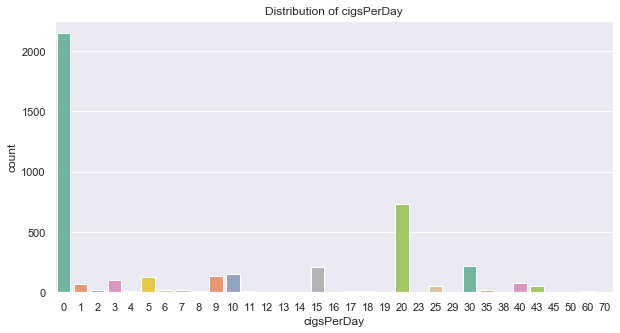

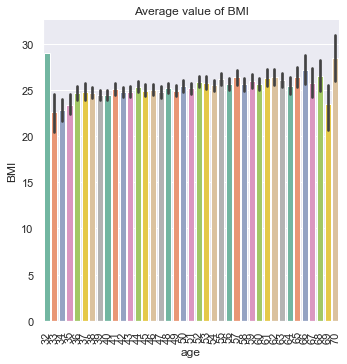

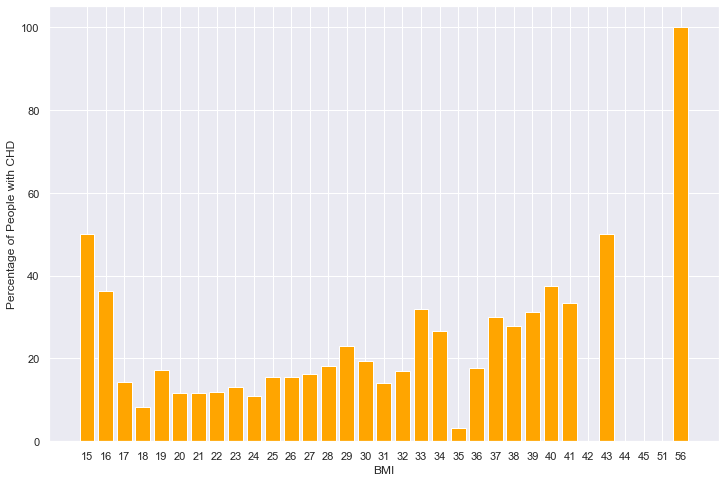

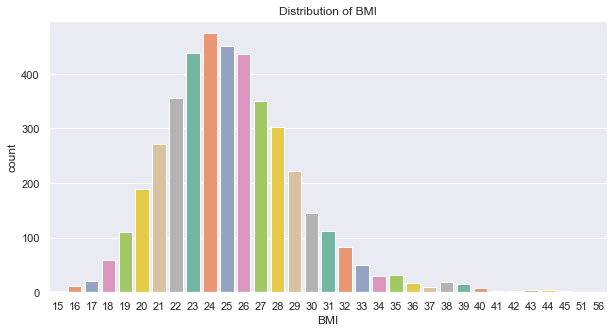

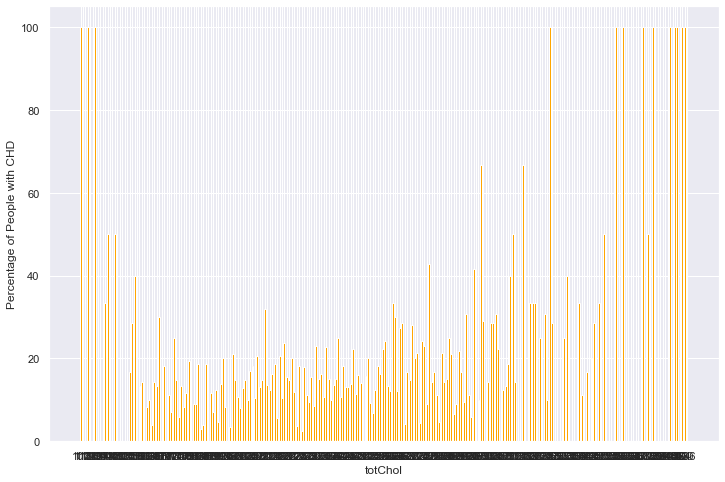

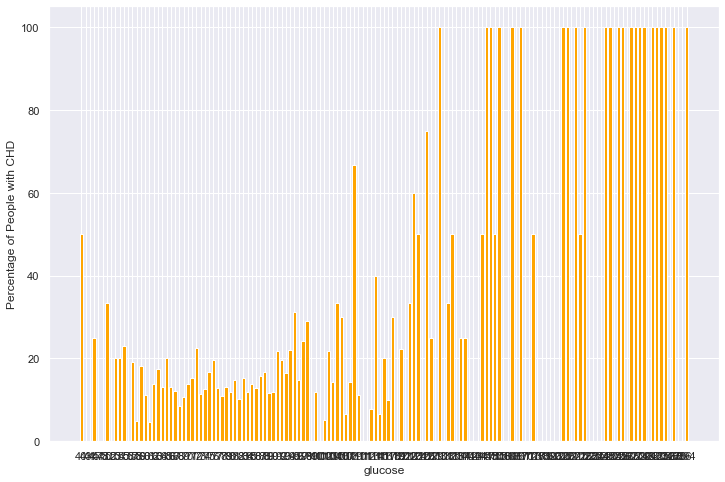

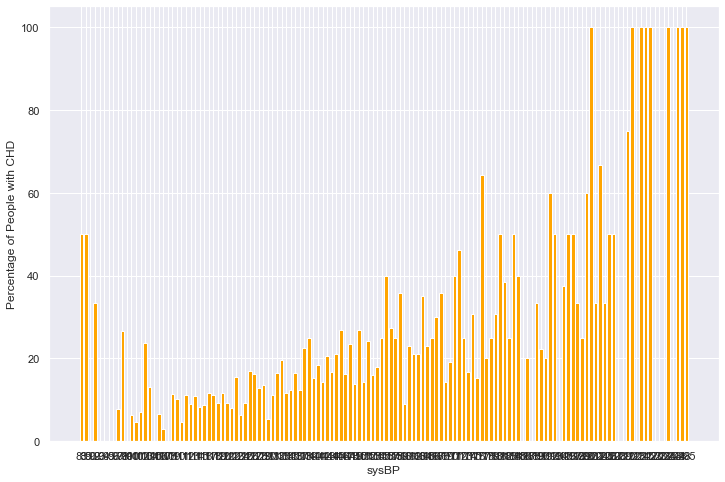

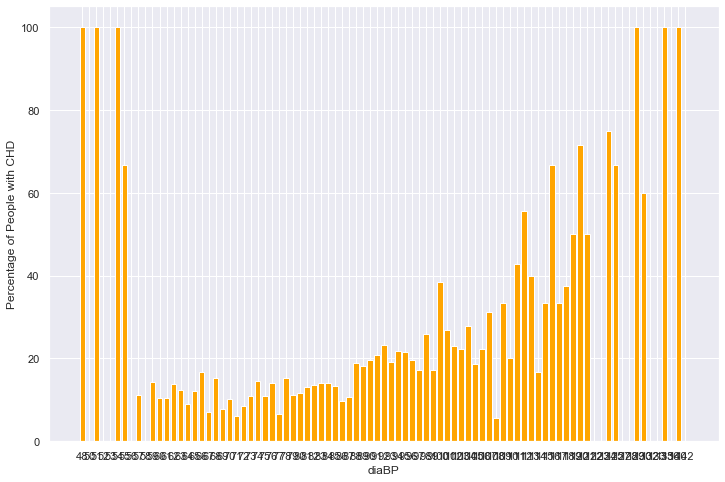

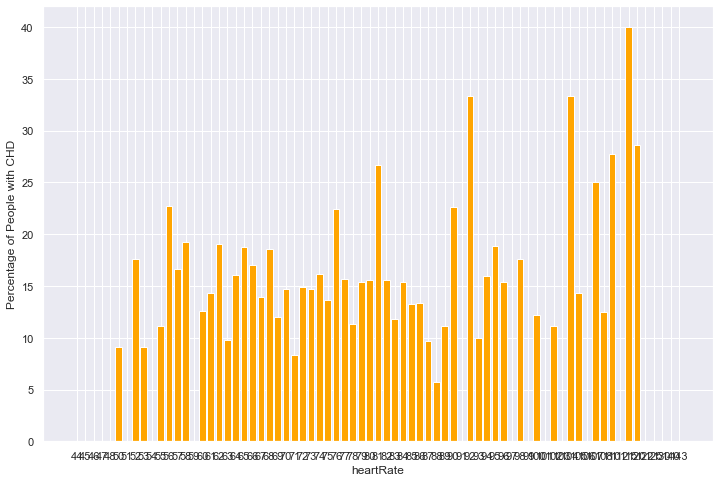

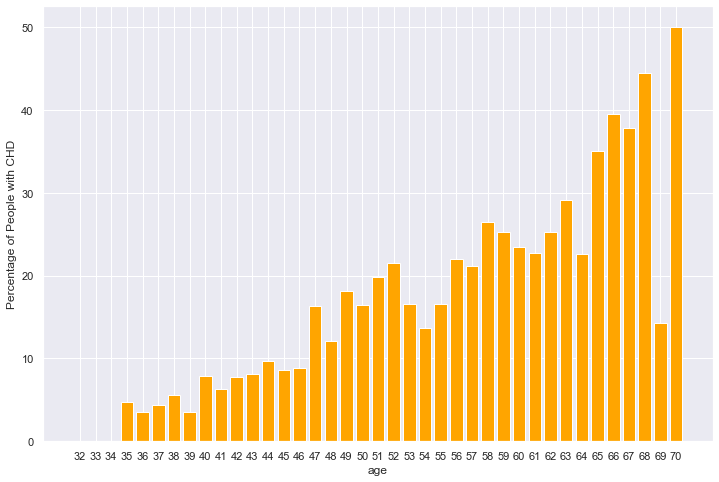

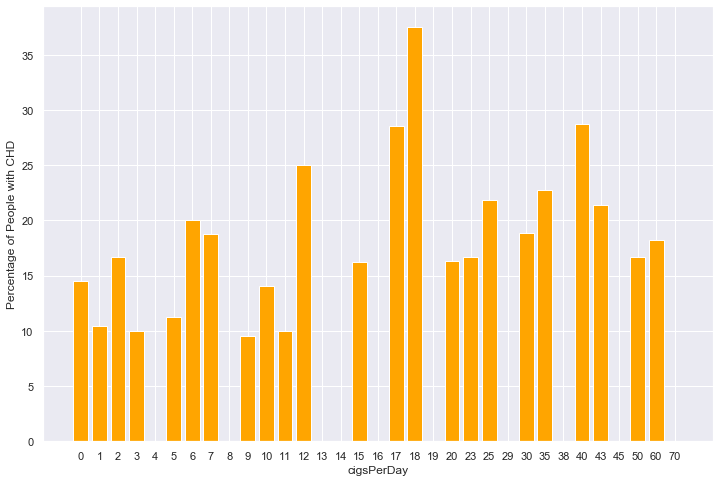

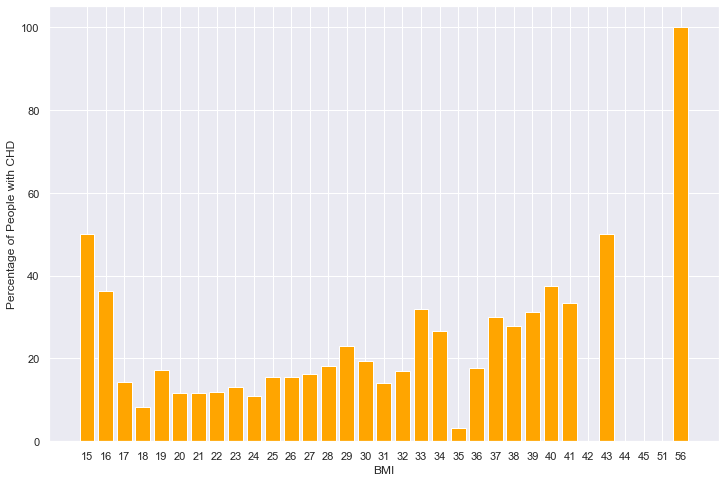

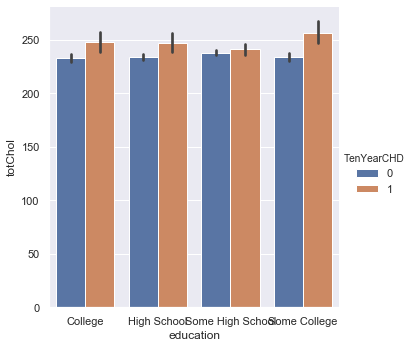

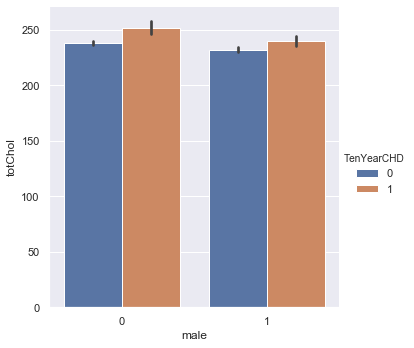

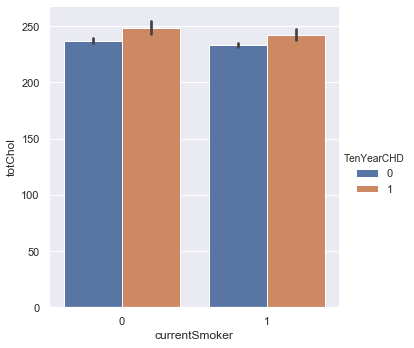

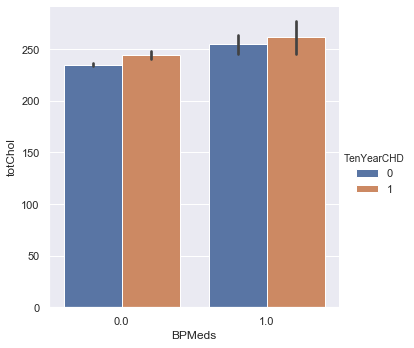

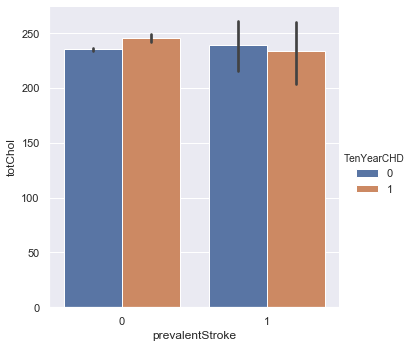

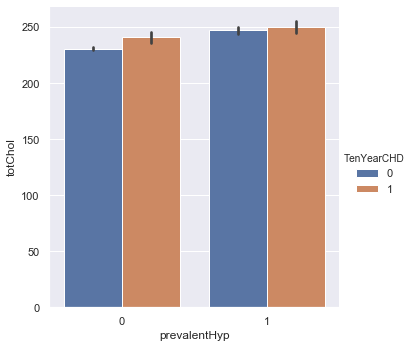

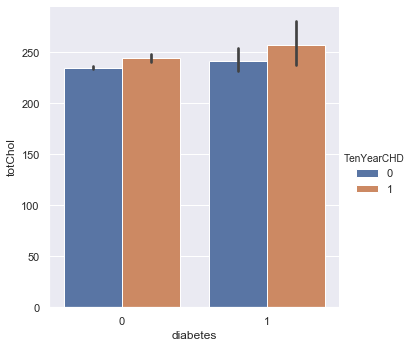

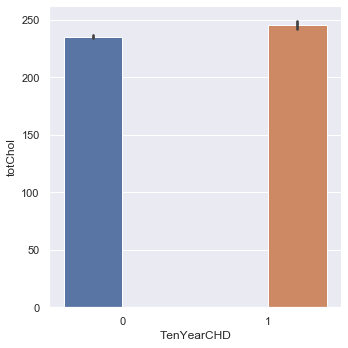

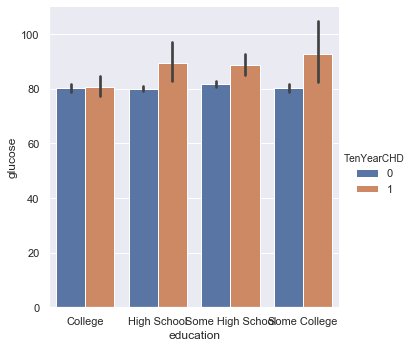

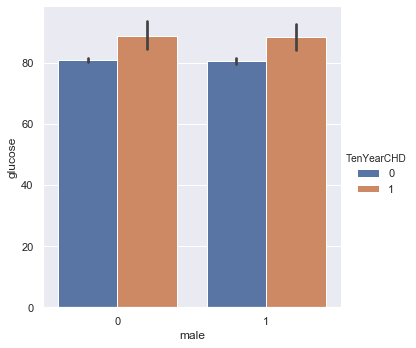

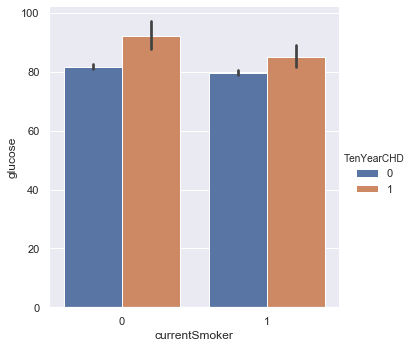

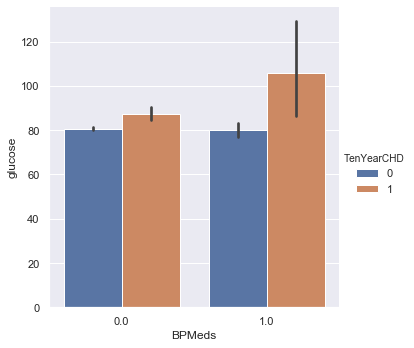

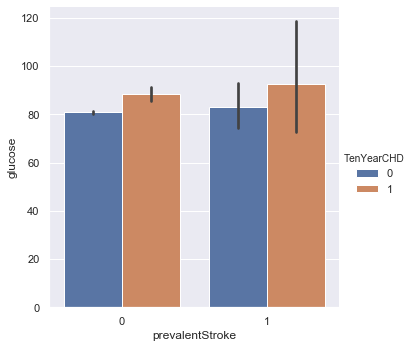

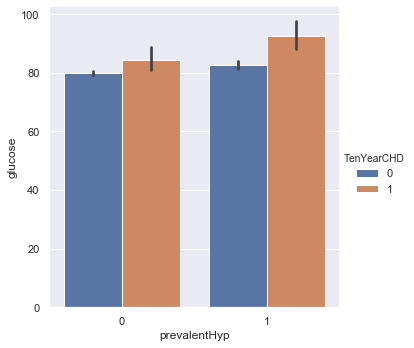

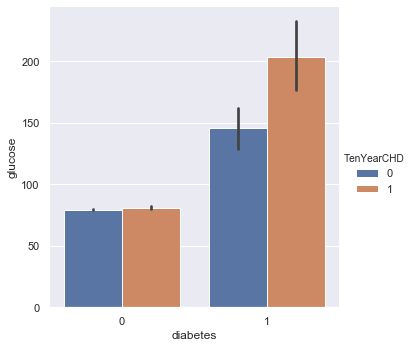

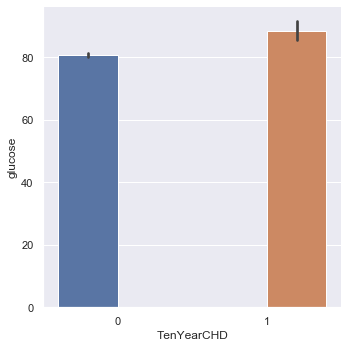

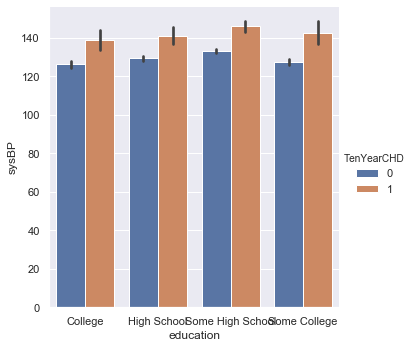

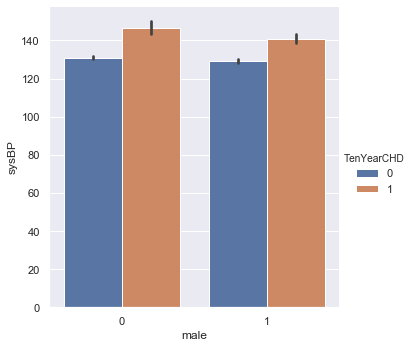

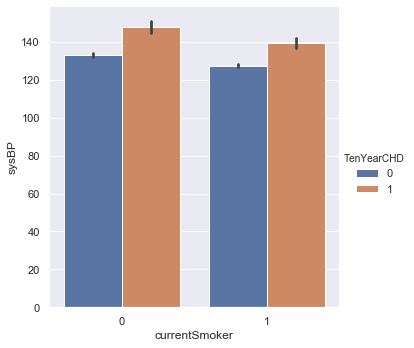

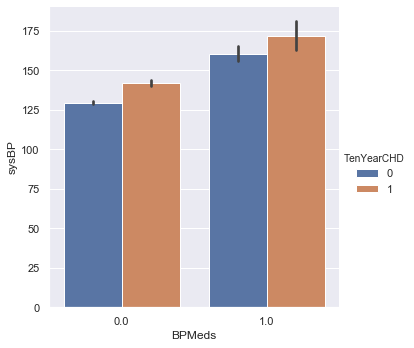

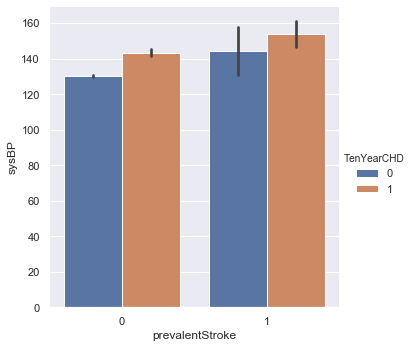

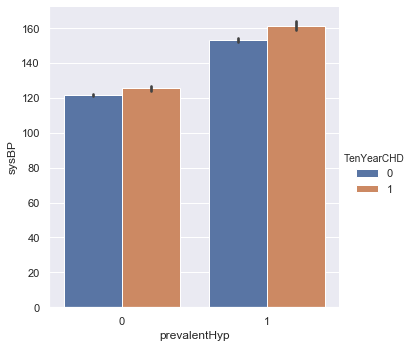

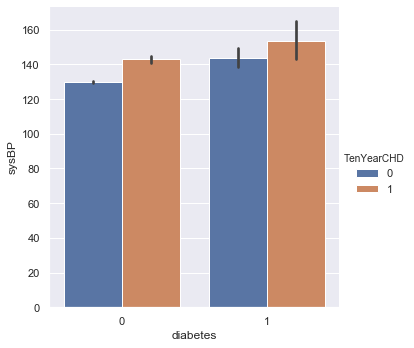

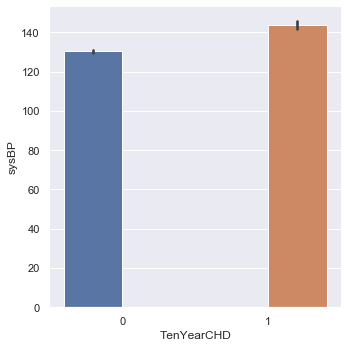

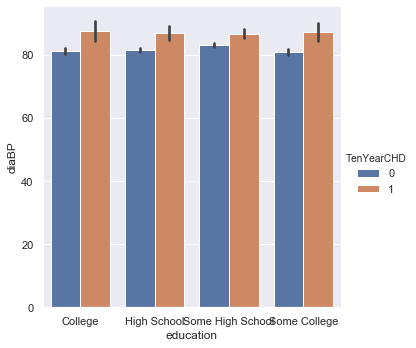

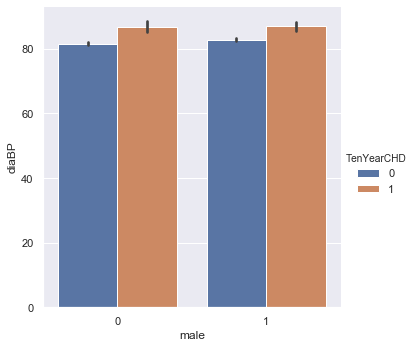

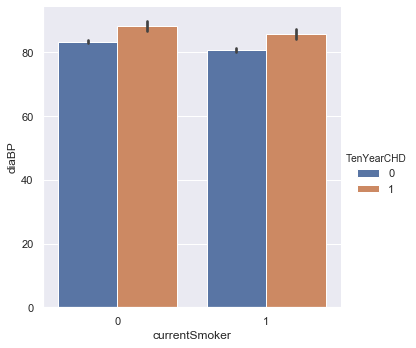

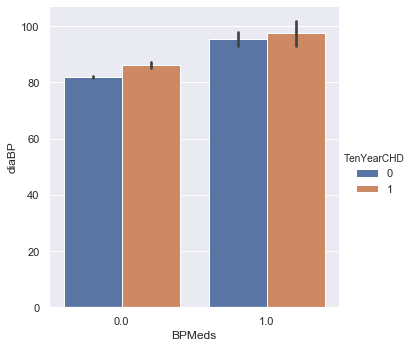

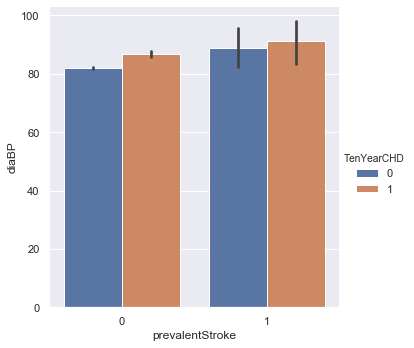

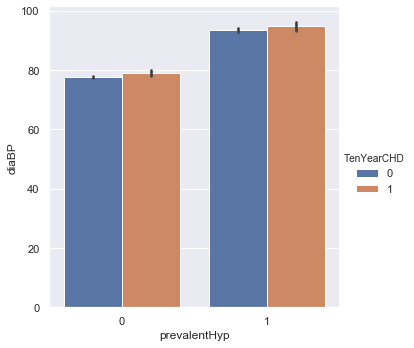

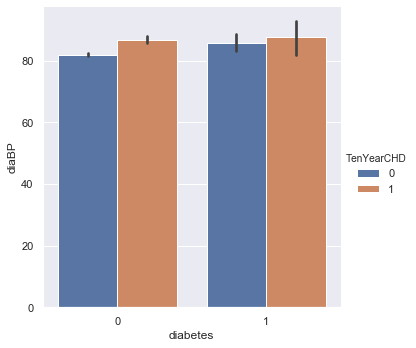

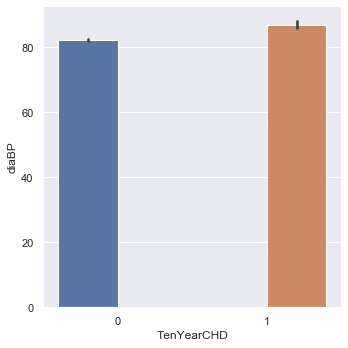

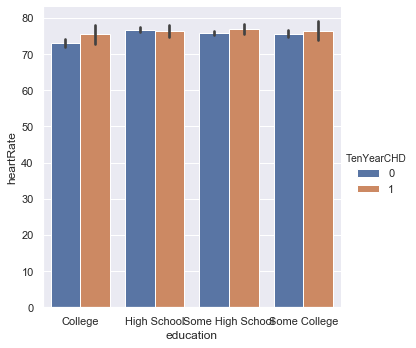

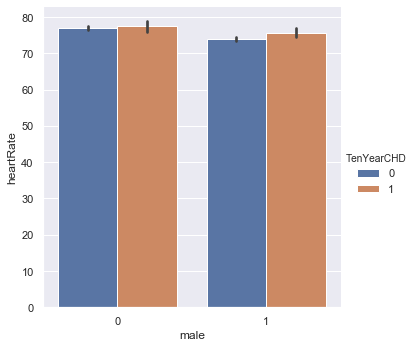

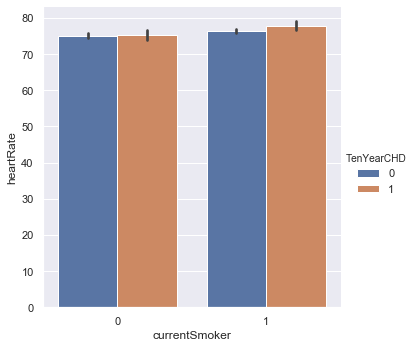

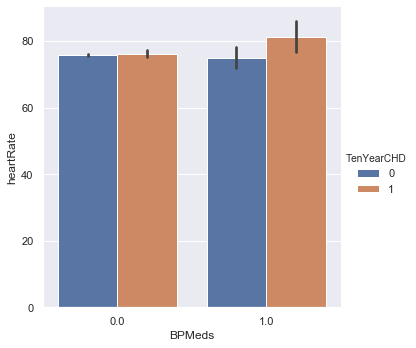

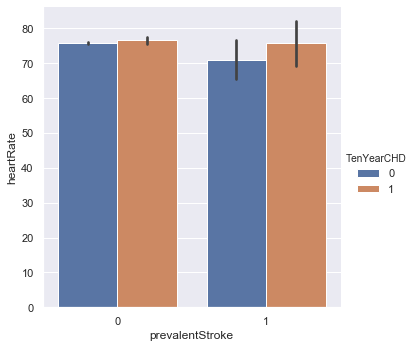

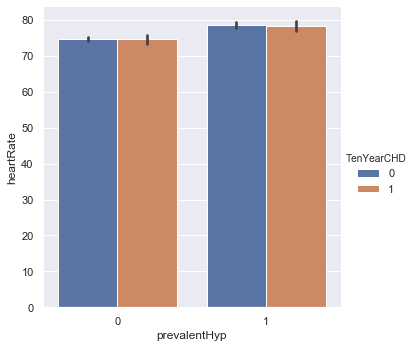

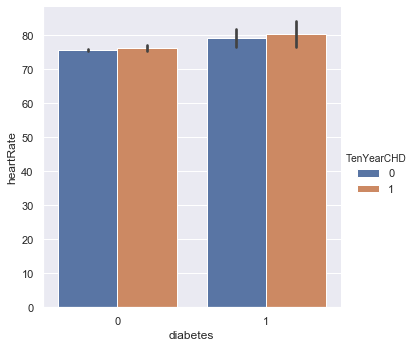

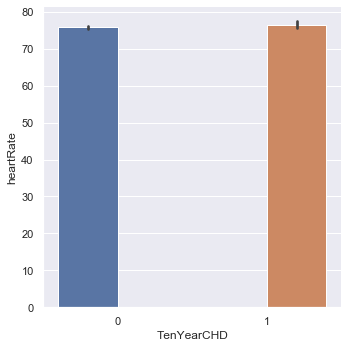

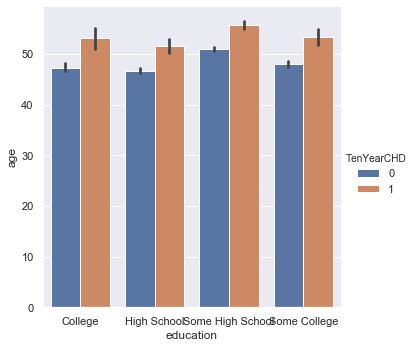

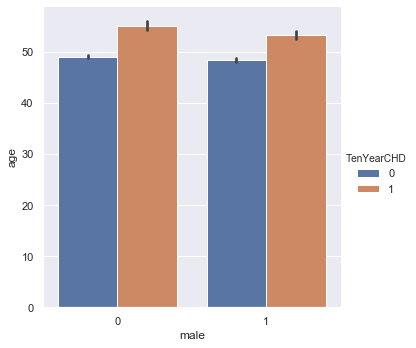

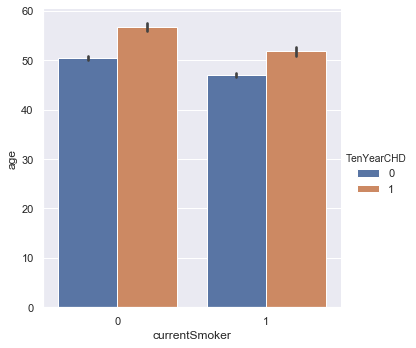

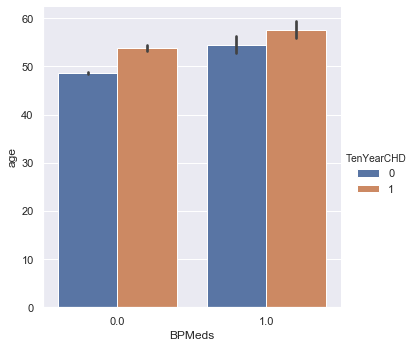

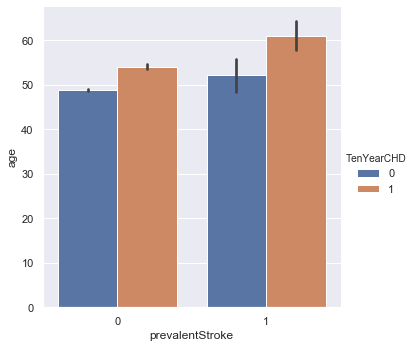

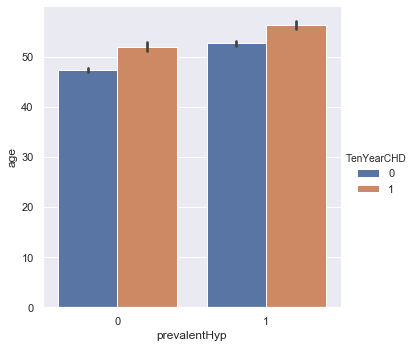

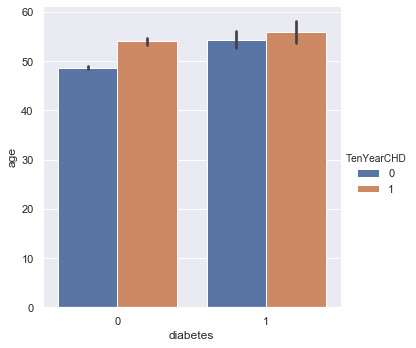

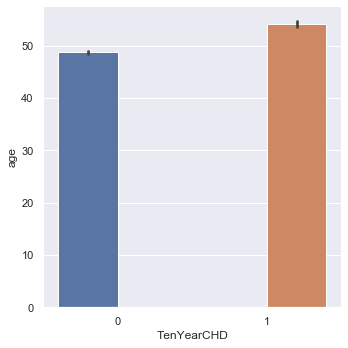

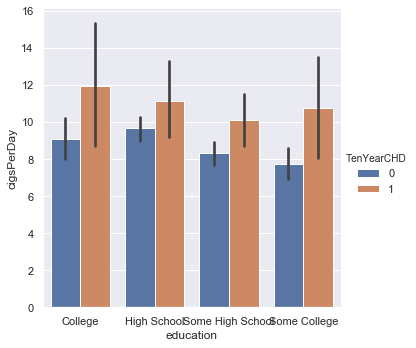

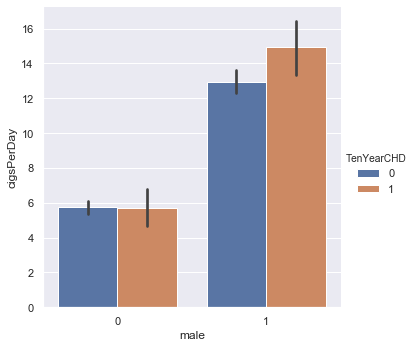

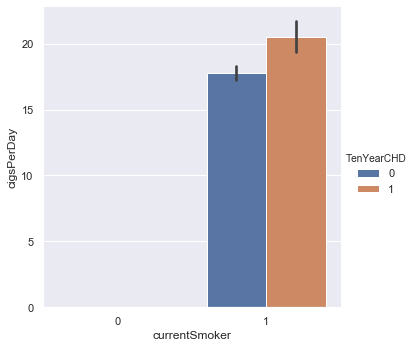

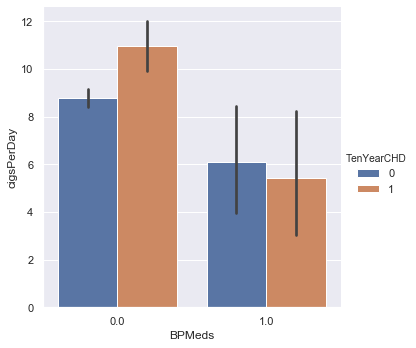

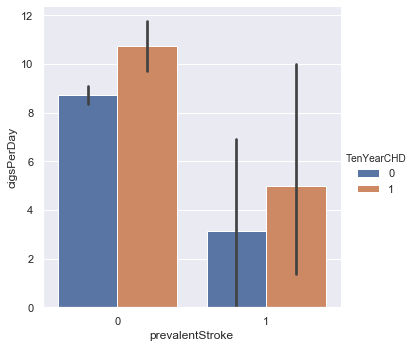

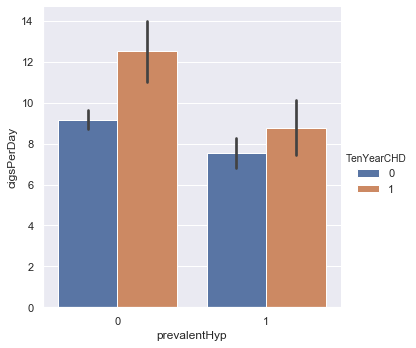

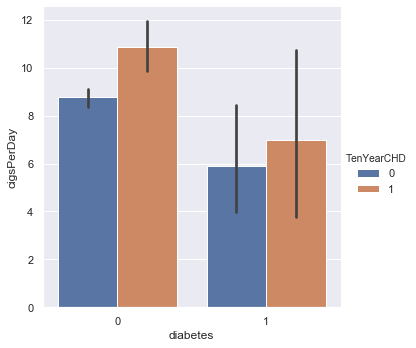

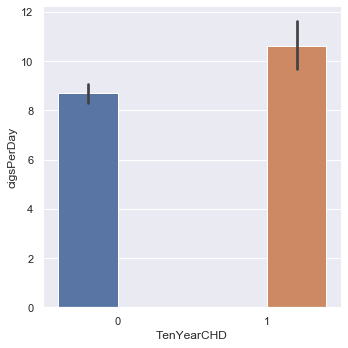

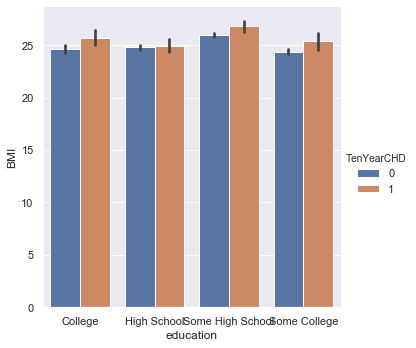

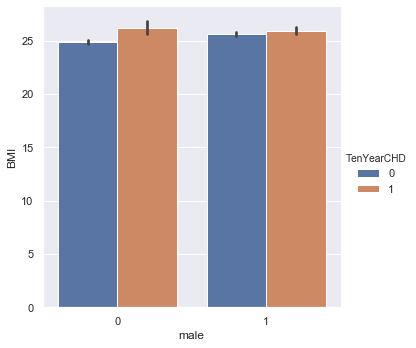

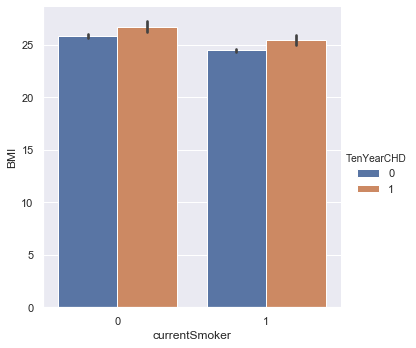

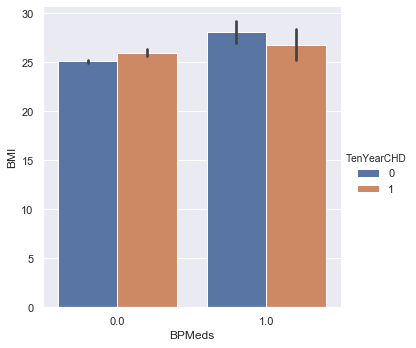

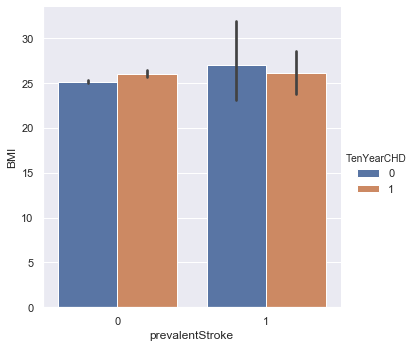

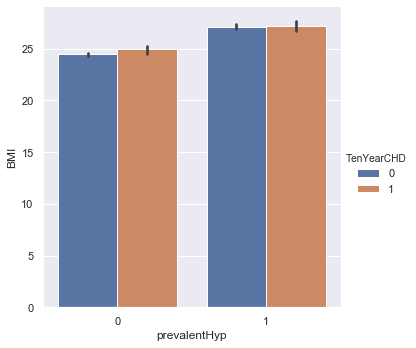

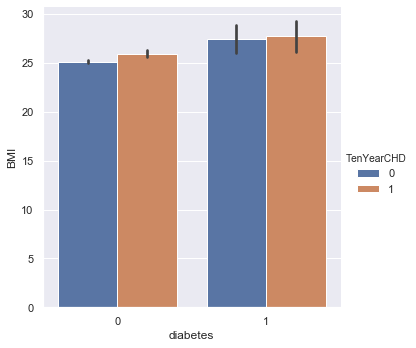

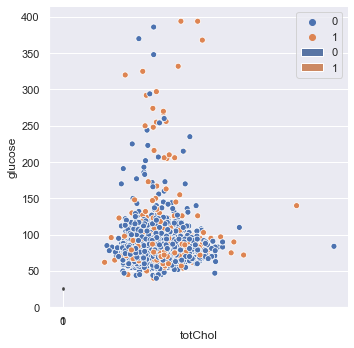

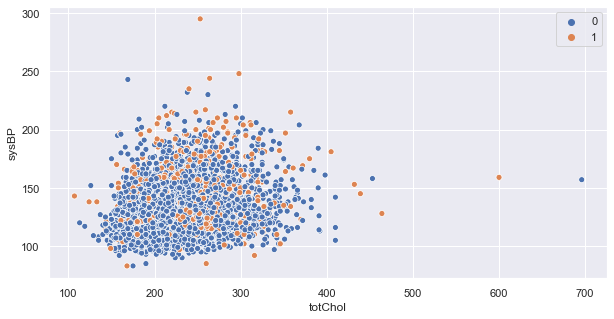

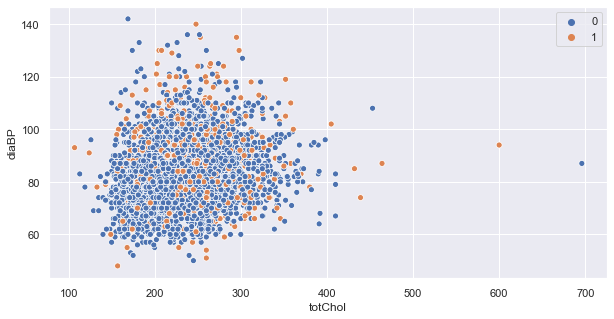

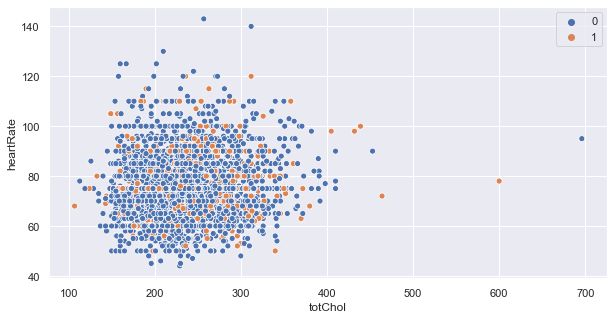

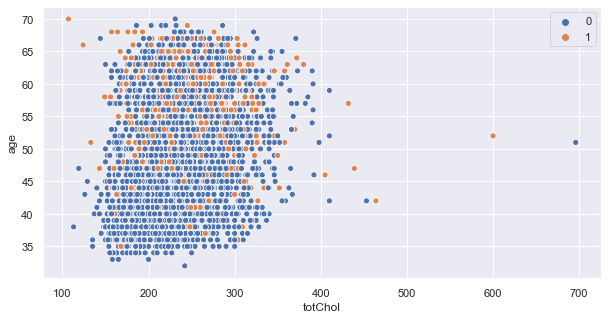

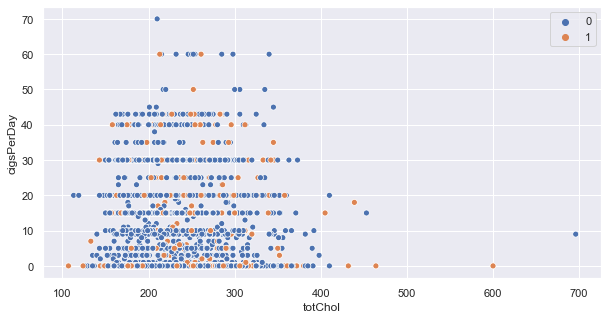

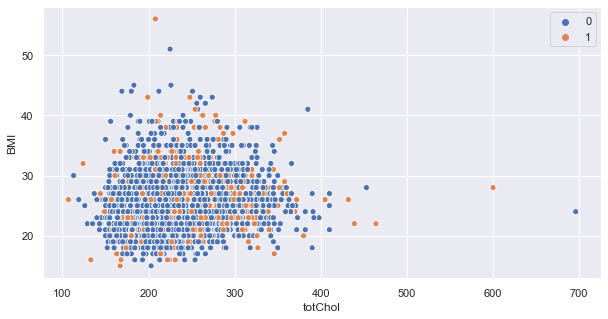

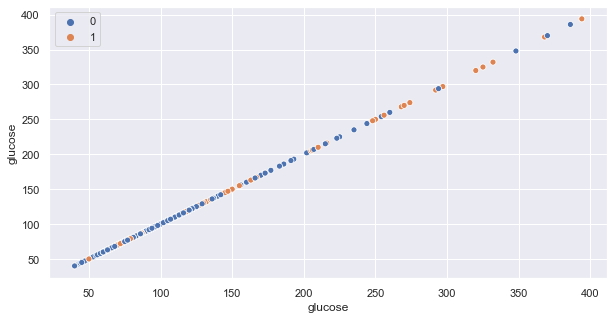

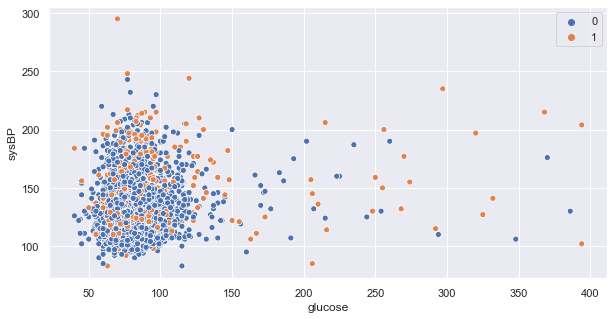

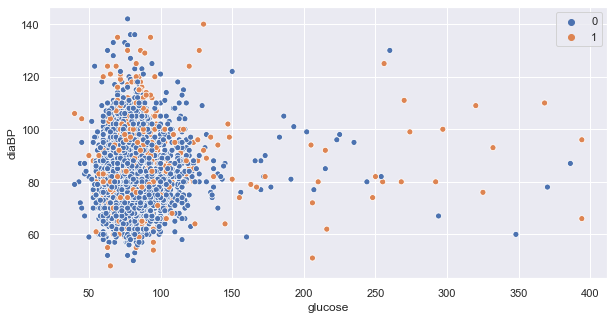

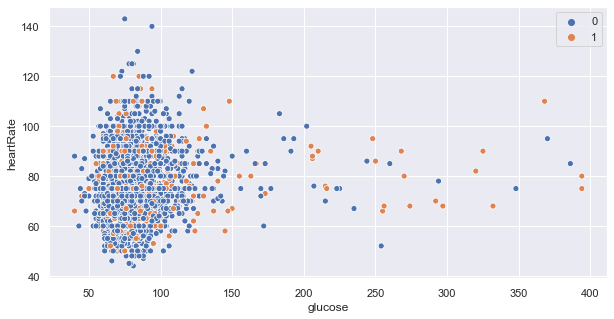

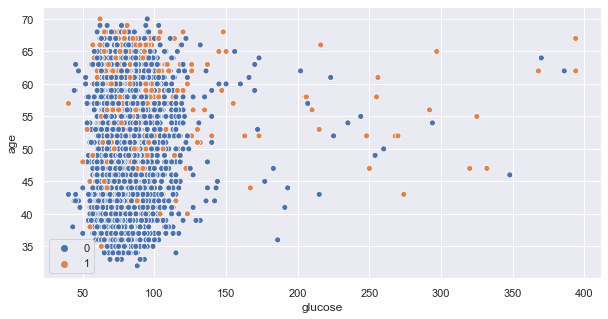

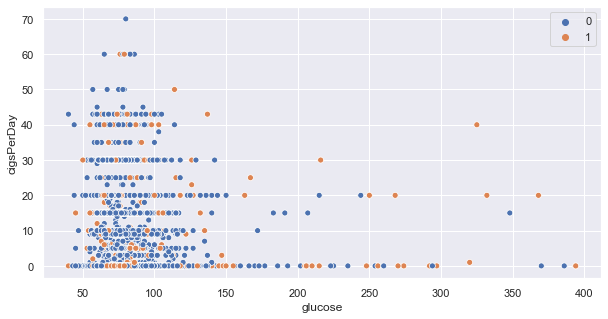

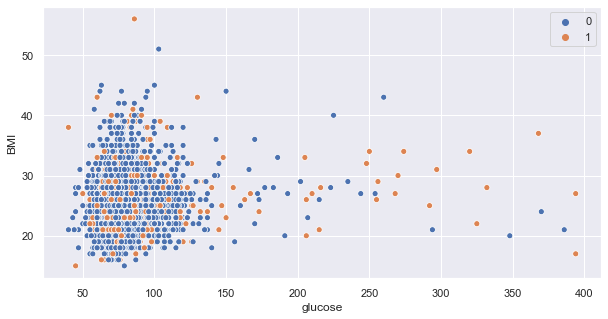

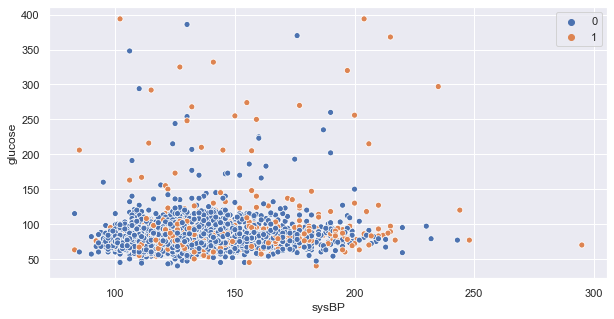

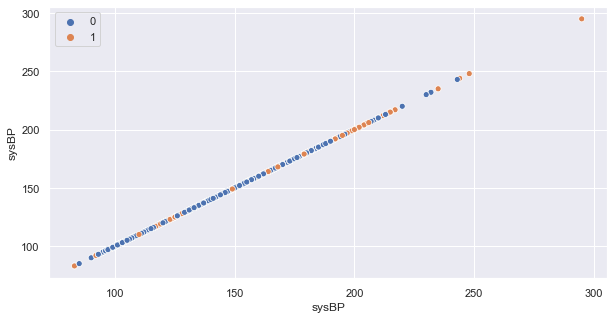

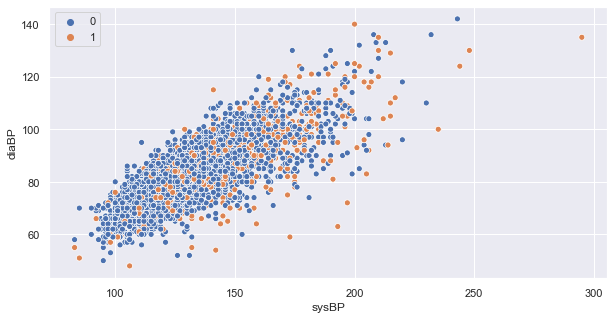

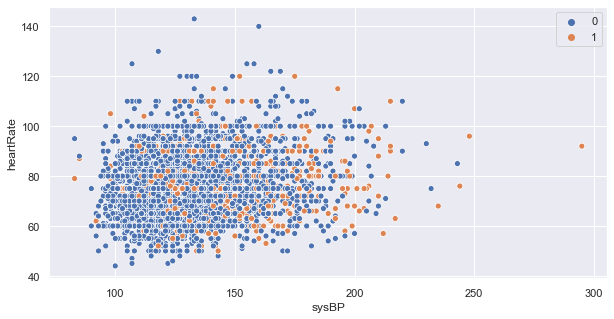

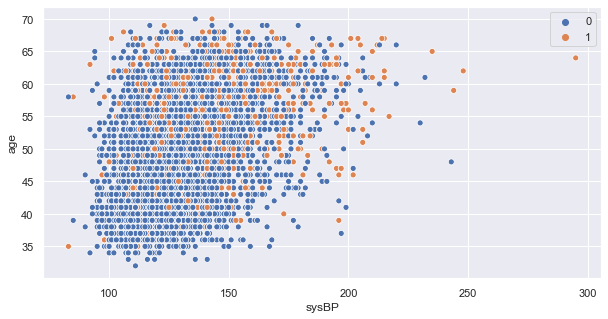

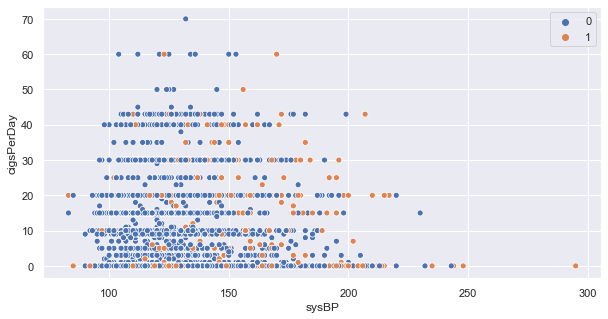

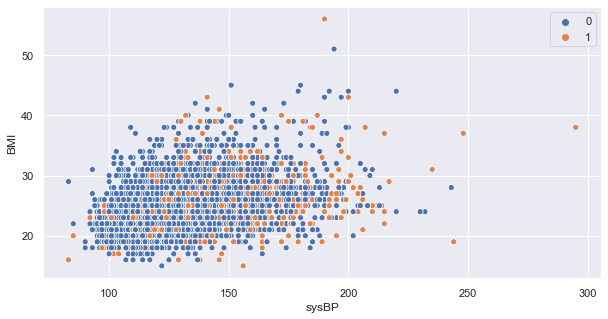

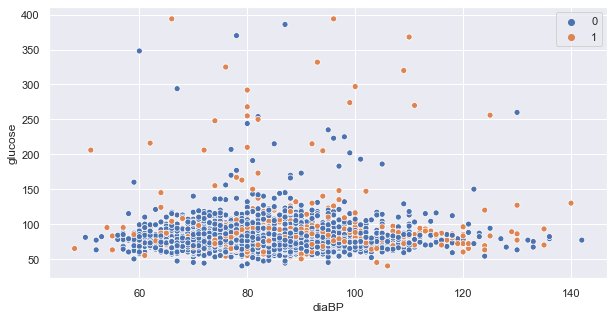

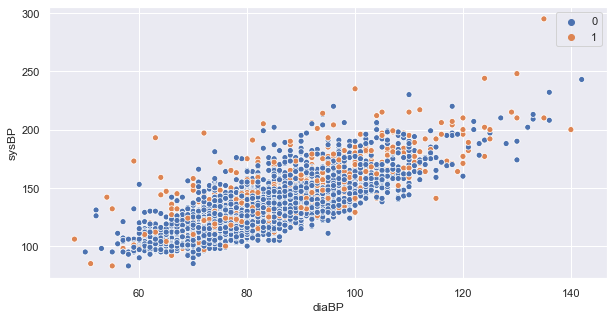

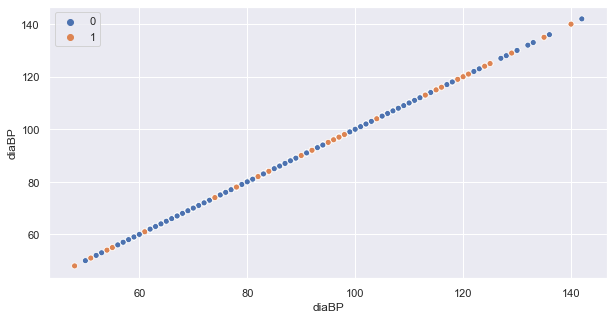

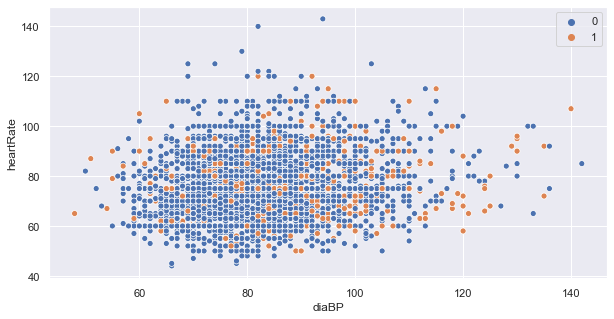

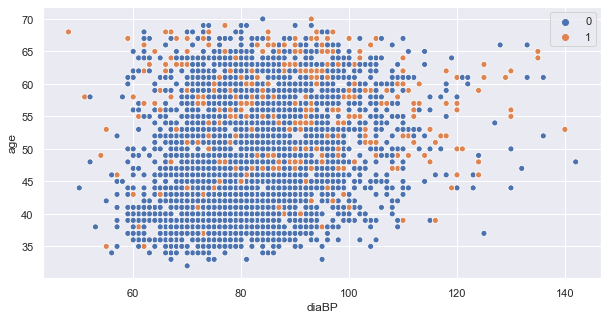

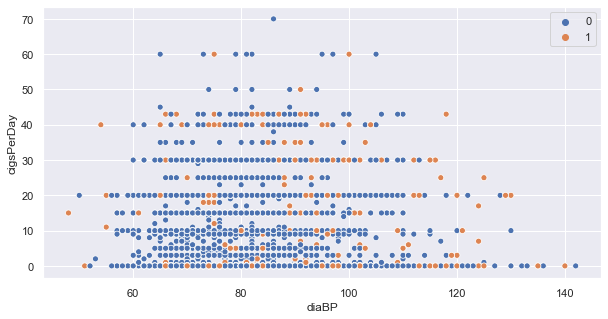

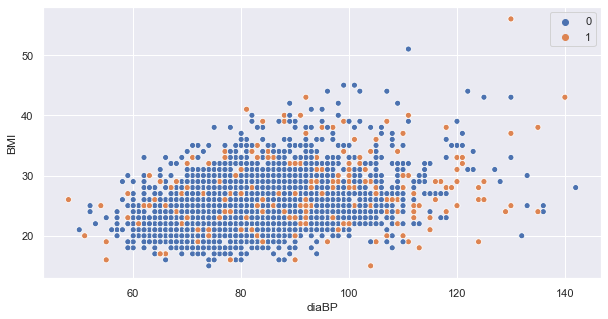

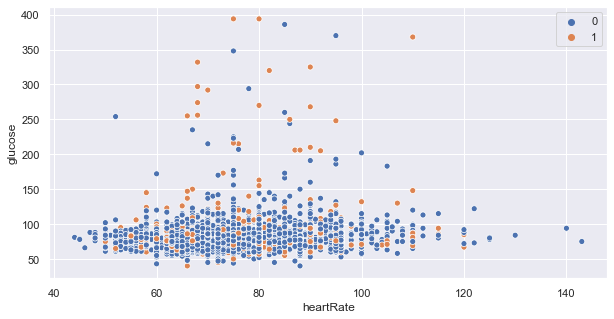

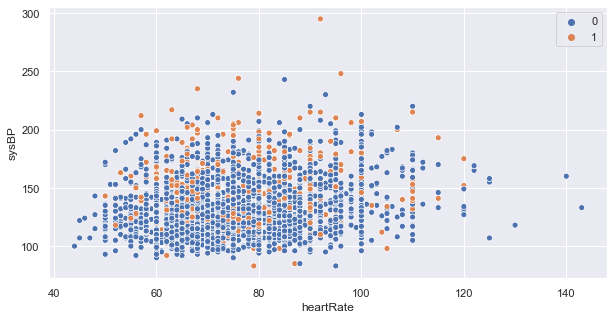

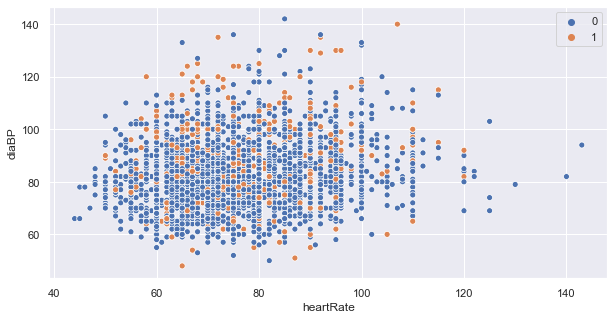

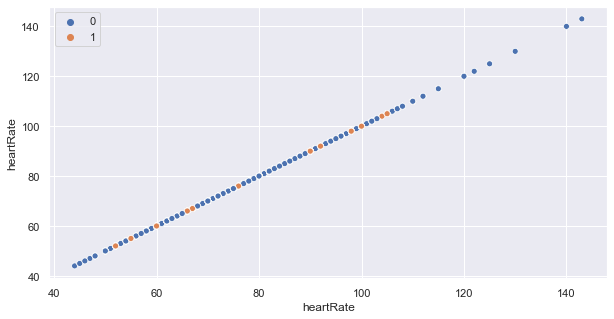

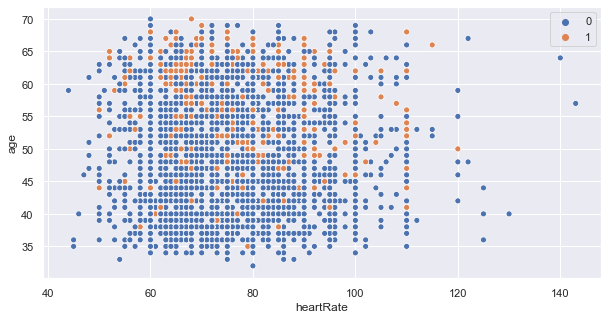

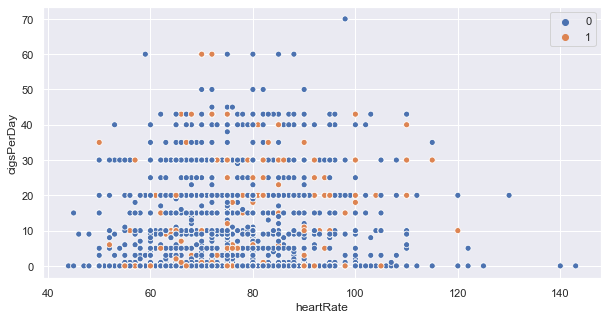

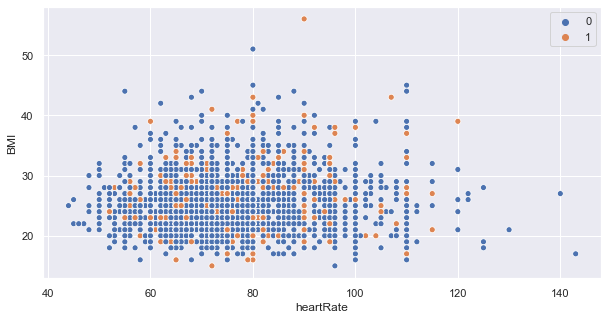

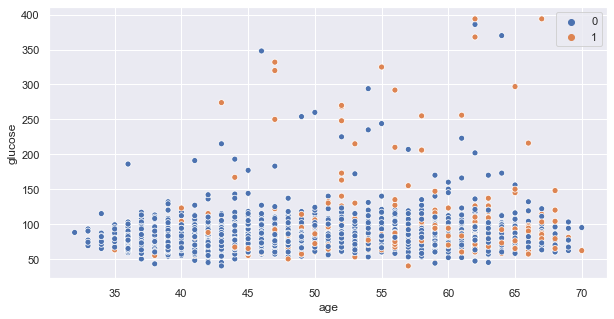

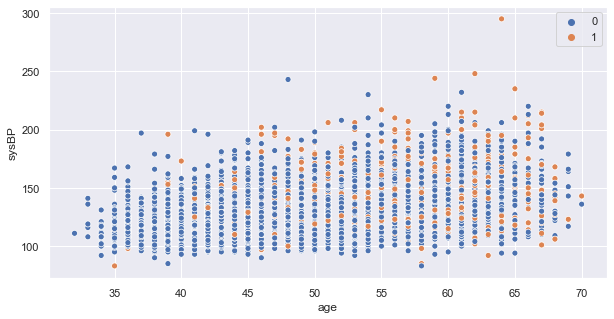

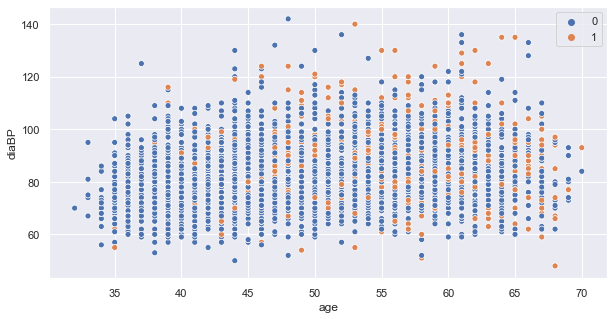

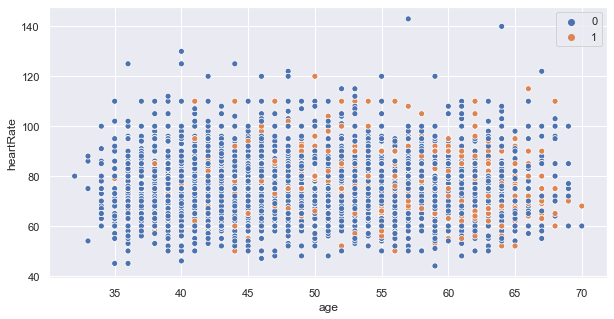

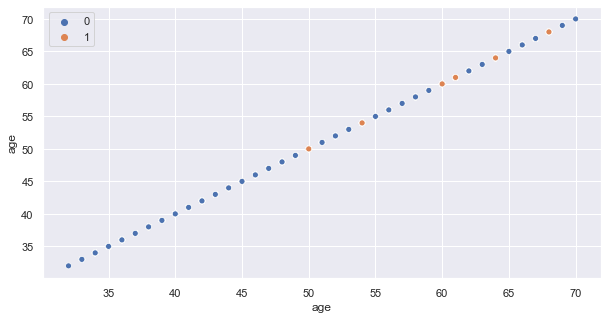

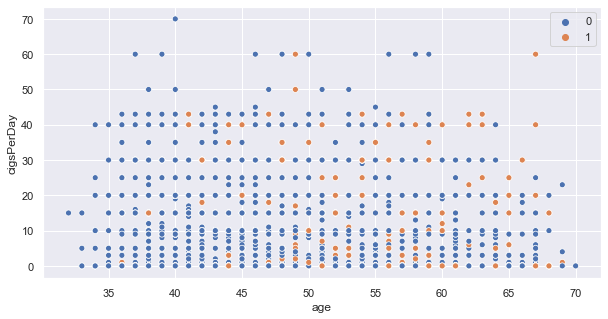

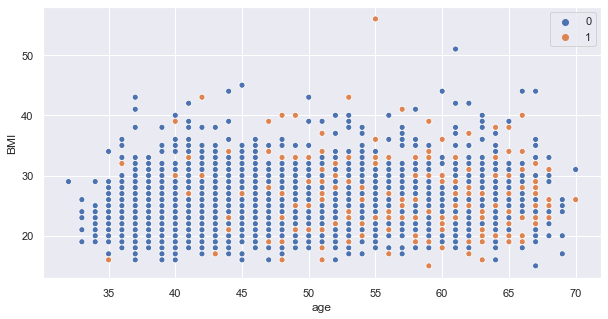

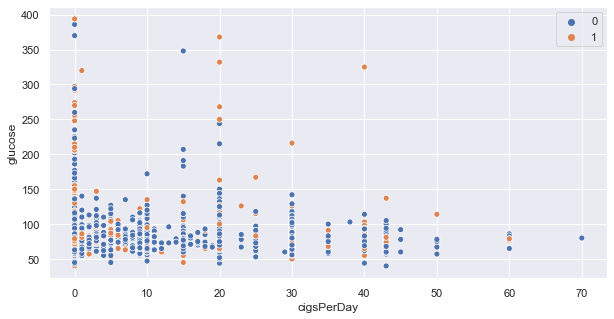

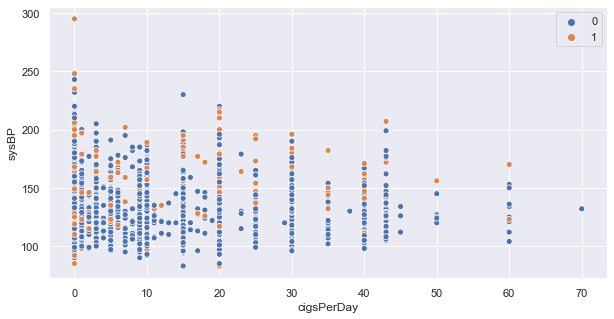

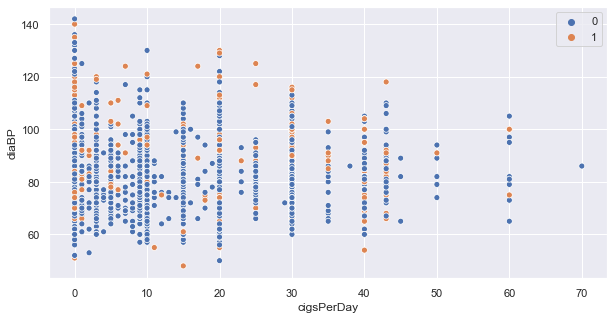

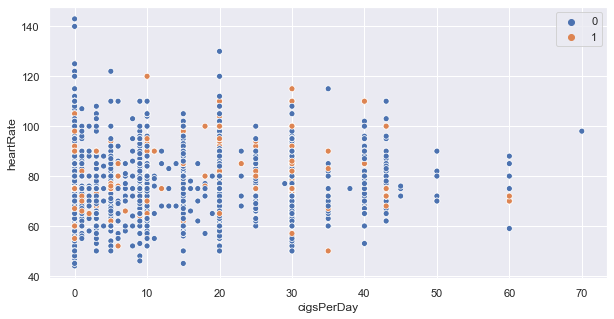

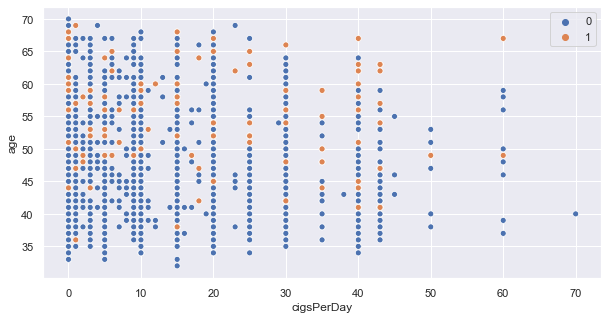

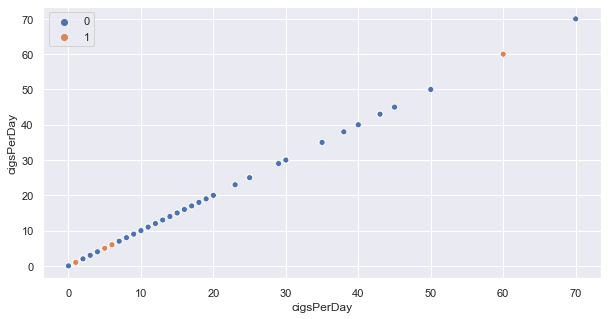

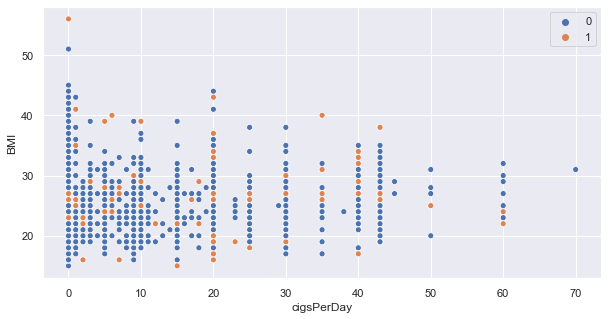

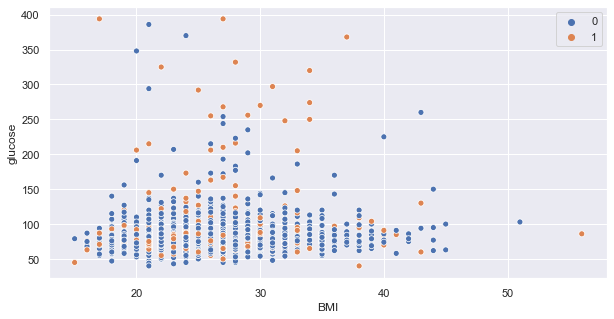

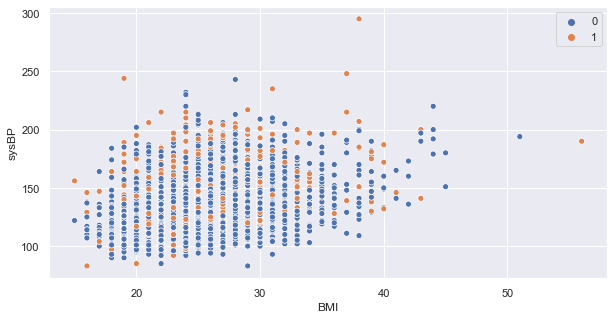

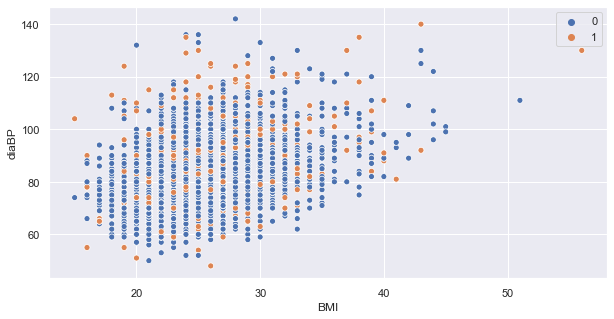

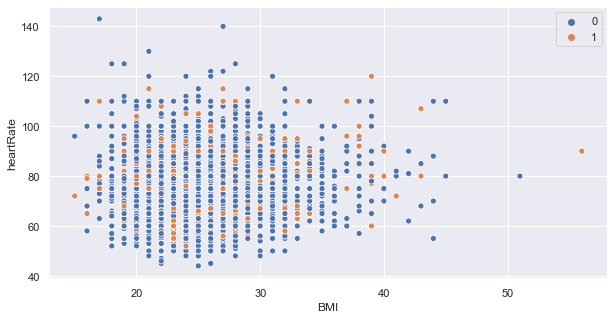

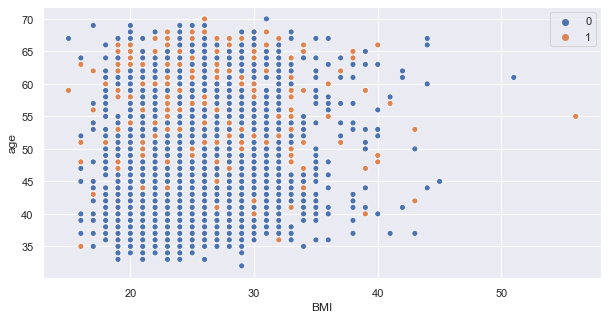

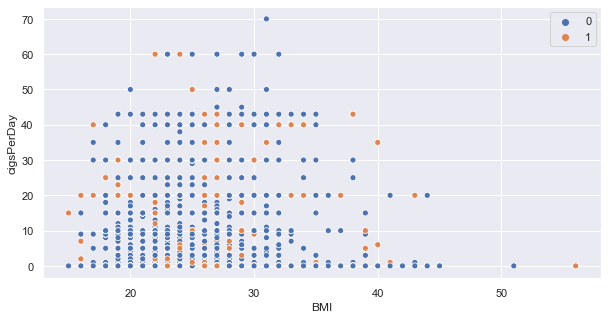

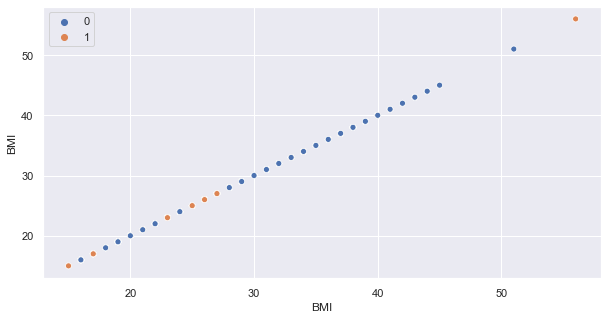

ValueError: invalid literal for int() with base 10: 'College'

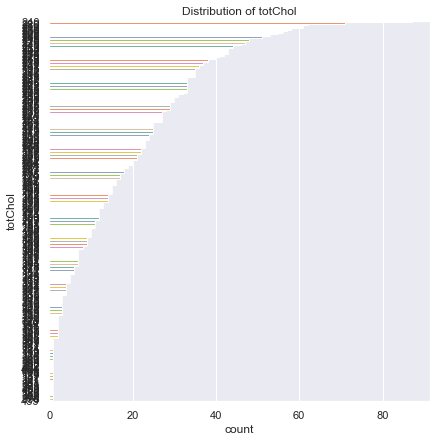

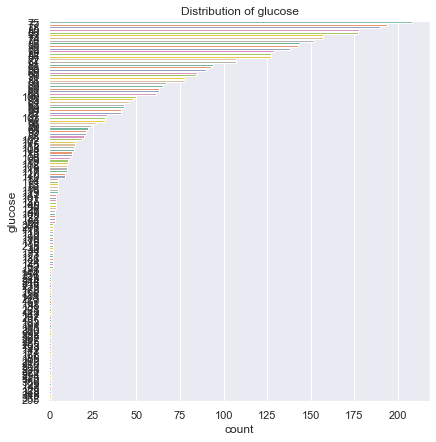

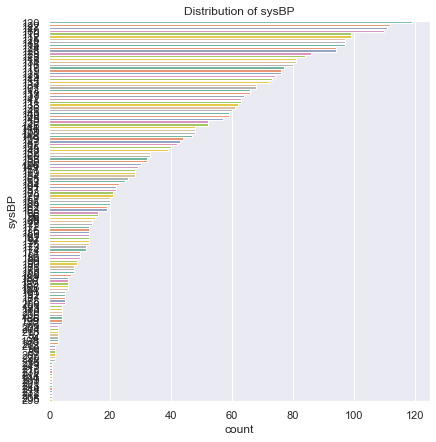

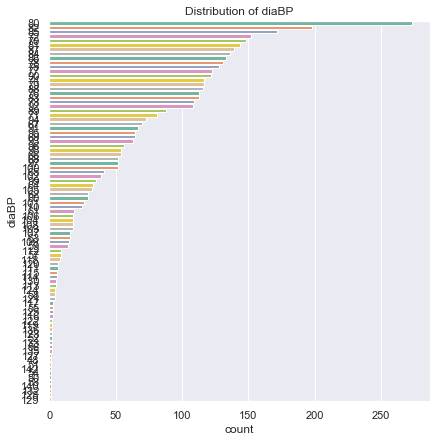

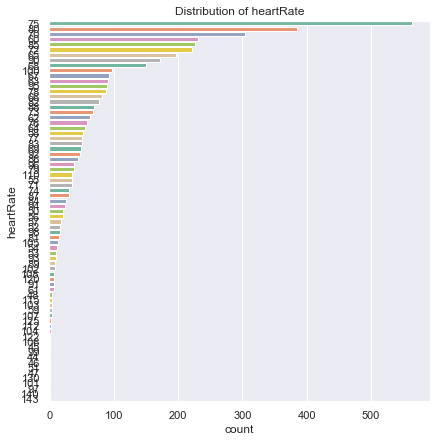

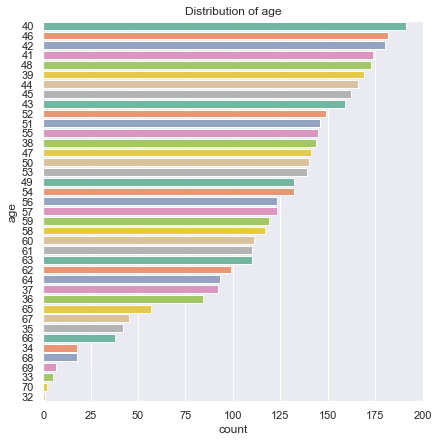

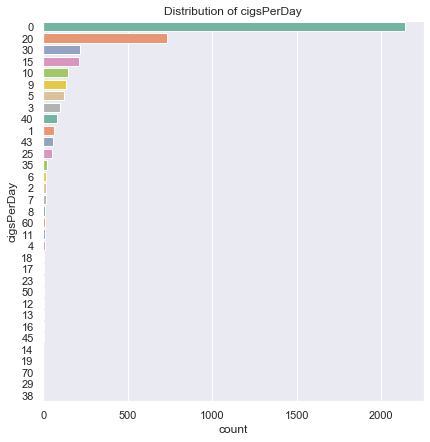

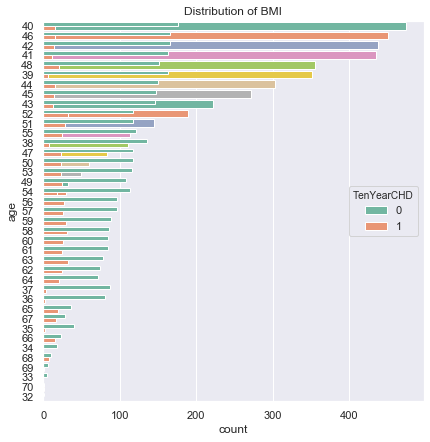

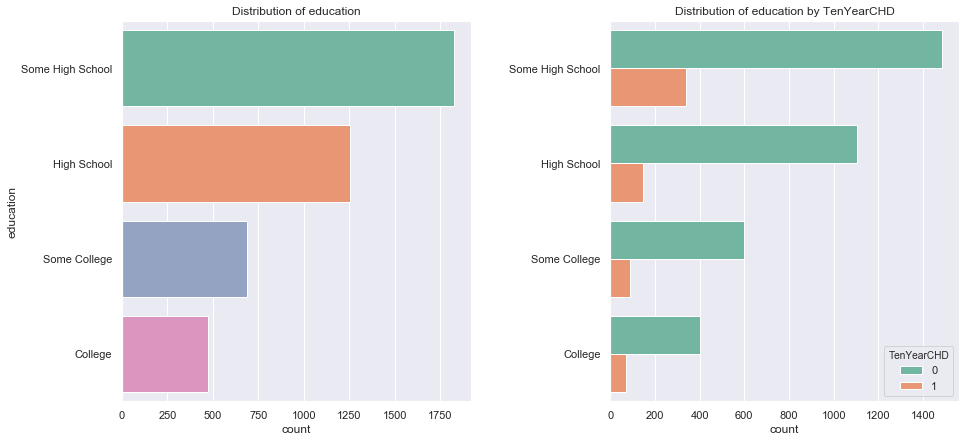

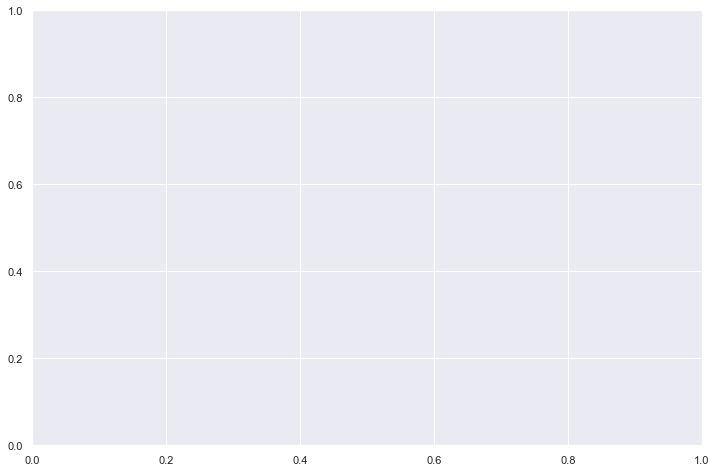

In [106]:
def snsPlot(data, numericCols, categoricalCols, response='TenYearCHD'):
       # try:

            #sns.pairplot(data[numericCols], hue=response, height=2.5, palette="Set2")
            plotSeries(data, numericCols, response, 'age', dpi=100)
            for i in numericCols:
                for j in [response]:
                    percentageDistribution(data, i, response)
            
            for i in numericCols:
                for j in categoricalCols:
                    #sns.jointplot(x=response, y=i, data=data)
                    sns.catplot(x=j, y=i, hue=response,   data=data, kind='bar')
                    #sns.kdeplot(data=data, x=i, hue=response, fill=True, 
                                #common_norm=False, palette="crest", alpha=.5, linewidth=0,)
                    #sns.swarmplot(x=j, y=i, hue=response, data=data)
            
            for i in range(len(numericCols)):
                for j in range(len(numericCols)-1):
                    #sns.jointplot(x=response, y=i, data=data)
                    sns.scatterplot(data=data, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full",
                                    hue=data[response].tolist())
                    #ax.legend(title=response)  # add a title to the legend
                    plt.show()
                    #sns.swarmplot(x=j, y=i, hue=response, data=data)

                # for i in numericCols[1:len(numericCols)]:
            #   sns.paidata[[indx1]]rplot(data[[response, numericCols[i]]])

            ################################
            
            for i in numericCols:
                for j in [response]:
                    plt.figure(figsize=(15, 7))
                    plt.subplot(121)
                    graph = sns.countplot(y=data[i],
                                          palette="Set2",
                                          order=data[i].value_counts().index[:500])
                    plt.title("Distribution of " + i)
                    
                    
            sns.countplot(y=data['age'], palette="Set2", hue=data[response],
                                          order=data['age'].value_counts().index[:200])
            
            for i in categoricalCols:
                for j in [response]:
                    plt.figure(figsize=(15, 7))
                    plt.subplot(121)
                    graph = sns.countplot(y=data[i],
                                          palette="Set2",
                                          order=data[i].value_counts().index[:100])
                    plt.title("Distribution of " + i)

                    plt.subplot(122)
                    sns.countplot(y=data[i],
                                  hue=data[j], palette="Set2",
                                  order=data[i].value_counts().index[:100])
                    plt.ylabel("")
                    plt.title("Distribution of " + i + " by " + j)

                    plt.subplots_adjust(wspace=.4)
                    
                    percentageDistribution(data, i, response)


snsPlot(df, numericCols, categoricalCols, response='TenYearCHD')

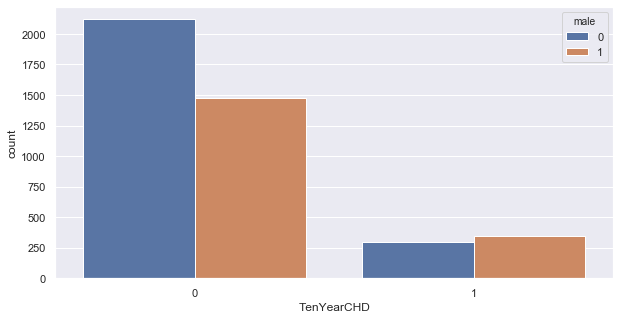

In [34]:
ax = sns.countplot(x="TenYearCHD", hue="male", data=df)
#convert to %
0    2419
1    1819

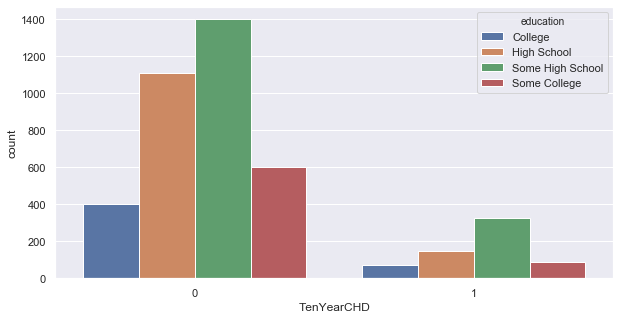

In [107]:
ax = sns.countplot(x="TenYearCHD", hue="education", data=df)
#convert to %
Some High School    1720
High School         1253
Some College         687
College              473
NaN                  105

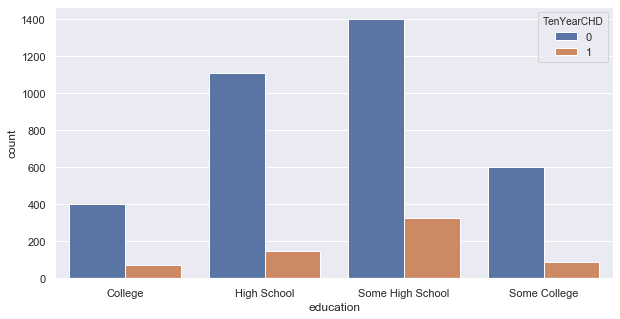

In [570]:
sns.countplot(x='education',data=df,hue='TenYearCHD')

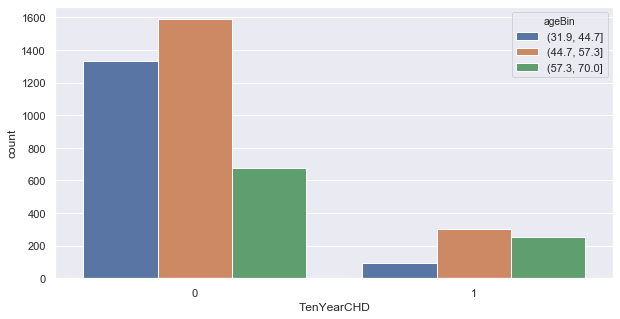

In [39]:
ax = sns.countplot(x="TenYearCHD", hue="ageBin", data=df_bin)
#consistently use Hue for ten year CHD

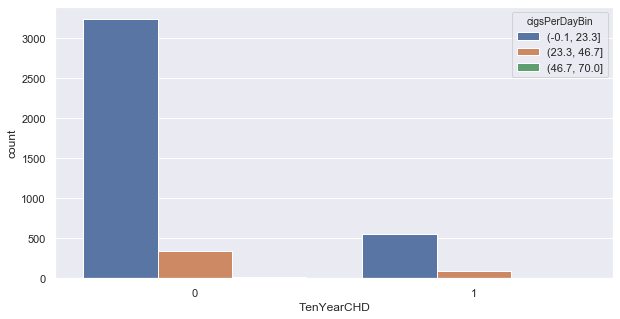

In [109]:
ax = sns.countplot(x="TenYearCHD", hue="cigsPerDayBin", data=df_bin)

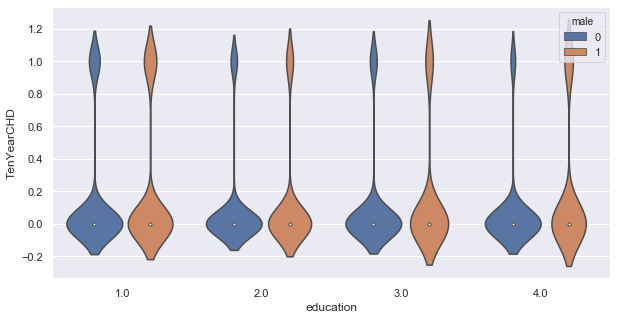

In [42]:
ax=sns.violinplot(x="education" , y="TenYearCHD" , hue="male" , data=df)

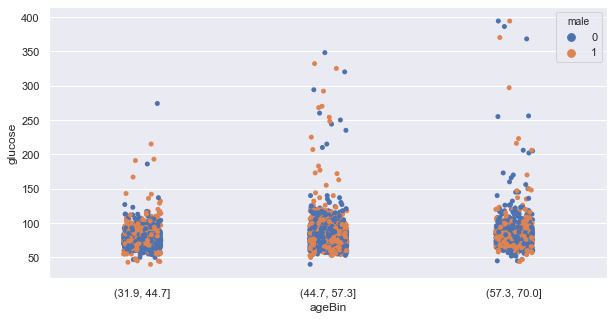

In [48]:
ax=sns.stripplot(x="ageBin" , y="glucose" , hue="male" , data=df_bin)

[Text(0, 0.5, '')]

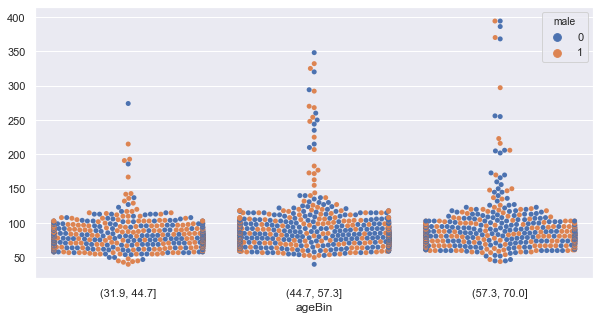

In [49]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(x="ageBin" , y="glucose" , hue="male" , data=df_bin)
ax.set(ylabel="")

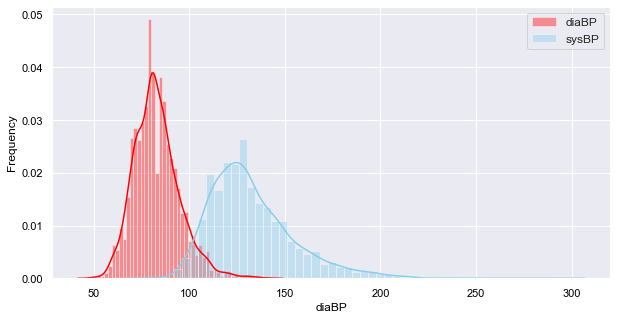

In [571]:
sns.distplot(df['diaBP'], color = 'Red', label = 'diaBP')
sns.distplot(df['sysBP'], color = 'skyblue', label = 'sysBP')
plt.legend(fontsize = 12)
plt.xlabel('diaBP', color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('histogram.png')

plt.show()
#do this wrt target variable .. add hue .. use kde plots

# MODELLING

In [ ]:
Preparation
Scale the dataset
Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance data

Principal Component Analysis
Perform PCA
Draw screen plot to find how many components should be selected for
Find contribution of columns on each dimension
Find Correlation between columns and dimensions
Find contribution of rows on each dimension
Find Correlation between rows and dimensions
Perform Clustering
Apply Models
Take first n dimension that contributes 90% variance
Apply following model
GLM
Decision Tree
Random Forest
SVM
Gradient Boosting Classifier
Artificial Neural Networks 



In [318]:
#Ways to split columns for test train

#Iteration 1: All data with out feature engineering
#Iteration 2: All data with all feature engineering
#Iteration 3: Mice imputed Vs. mean imputed
#Iteration 4: All data + FE + Outlier removed
#Iteration 5: All data + FE + Binning
#Iteration 6: All data + FE + Binning + PCT treatment
#Iteration 7: All data + FE + SMOTE
#Iteration 8: All data + FE + Outlier removed + Binning +PCT treatment + SMOTE
#Iteration 9 : with PCA

X = df.iloc[:, :-1].values # copy all columns excluding last column
Y = df.iloc[:, -1].values   # copy the last column only
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [319]:

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    random_state=42
)
logisticRegr.fit(X_train, y_train)
logisticRegr_predict = logisticRegr.predict(X_test)
logisticRegr_predict_proba = logisticRegr.predict_proba(X_test)[:,1]
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print('Accuracy:',format(accuracy_score(y_test, logisticRegr_predict)*100))
print('AUC:',format(roc_auc_score(y_test, logisticRegr_predict_proba)*100))
print('Classification_report:',classification_report(y_test, logisticRegr_predict))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, logisticRegr_predict)
cm

Accuracy: 85.35031847133759
AUC: 73.54680847721238
Classification_report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1201
           1       0.61      0.07      0.12       212

    accuracy                           0.85      1413
   macro avg       0.73      0.53      0.52      1413
weighted avg       0.82      0.85      0.80      1413



array([[1192,    9],
       [ 198,   14]])

# EVALUATION

In [ ]:
Predict
Transform test data into PCA
Run the model against test data

Calculate the Accuracy
Generate confusion matrix
Draw AUC for each model
Display accuracy of each model in a tabular form


# IGNORE FOLLOWING.. WORK IN PROGRESS

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.3,random_state=42)

#!pip install h2o
import h2o
h2o.init()
train_h = h2o.H2OFrame(train)
test_h = h2o.H2OFrame(test)
response = 'TenYearCHD'

train_h[response] = train_h[response].asfactor()
test_h[response] = test_h[response].asfactor()

features = train_h.columns
features.pop(0)

In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name="GLM",
                  max_models = 15,
                  nfolds =3,
                  stopping_metric="AUC",
                  sort_metric="AUC",
                  exclude_algos=["StackedEnsemble","DeepLearning","DRF","XGBoost","GBM"],
                  seed = 1234,
                  balance_classes=True)


automl.train(training_frame=train_h,y=response,x=features)
lb = automl.leaderboard
lb

In [ ]:
model_id = [i for i in lb.as_data_frame()["model_id"]][0]
model = h2o.get_model(model_id)
model.varimp_plot()

In [ ]:
model.model_performance(test_h)

In [316]:


#from collections import Counter
counter=Counter(y_train)
print('before',counter)
smt=SMOTE()
X_train_sm, y_train_sm =smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print('after',counter)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())
clf.best_params_
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()


ModuleNotFoundError: No module named 'imblearn'

In [95]:
#Converting all datatypes to integer for further processing
#df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose','heartRate']] = df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose','heartRate']].astype(int)
#df[['heartRate']] = df[['heartRate']].astype(int)
#df.iloc[:,0:8] = df.iloc[:,0:8].astype(int)

In [287]:
def imputeByMean(data, nonNumeric):
    imputedMean = SimpleImputer(strategy='mean') # for median imputation replace 'mean' with 'median'
    dataNumeric = data.drop(nonNumeric, axis=1)
    imputedMean.fit(dataNumeric)
    imputedData = imputedMean.transform(dataNumeric)

    d1 = pd.DataFrame(imputedData)
    d1.columns = dataNumeric.columns
    finalImputedData = pd.concat([d1, data.loc[:,nonNumeric]], axis=1)
## imputedData.columns = data.columns
    return finalImputedData
cols = df.columns
num_cols = df._get_numeric_data().columns
nonNumeric=list(set(cols) - set(num_cols))

imputeByMean(df,nonNumeric)

#Use Mice 
#For categorical - delete rows and apply mice on numerical 
#pip install impute 


#Performing mean imputation on the fields that have nulls
#df["education"].replace(np.nan, df["education"].astype("float32").mean(axis = 0), inplace = True)
#df["cigsPerDay"].replace(np.nan, df["cigsPerDay"].astype("float32").mean(axis = 0), inplace = True)
#df["BPMeds"].replace(np.nan, df["BPMeds"].astype("float32").mean(axis = 0), inplace = True)
#df["totChol"].replace(np.nan, df["totChol"].astype("float32").mean(axis = 0), inplace = True)
#df["BMI"].replace(np.nan, df["BMI"].astype("float32").mean(axis = 0), inplace = True)
#df["glucose"].replace(np.nan, df["glucose"].astype("float32").mean(axis = 0), inplace = True)
#df["heartRate"].replace(np.nan, df["heartRate"].astype("float32").mean(axis = 0), inplace = True)

male   age  education  currentSmoker  cigsPerDay   BPMeds  \
0      1.0  39.0        4.0            0.0         0.0  0.00000   
1      0.0  46.0        2.0            0.0         0.0  0.00000   
2      1.0  48.0        1.0            1.0        20.0  0.00000   
3      0.0  61.0        3.0            1.0        30.0  0.00000   
4      0.0  46.0        3.0            1.0        23.0  0.00000   
...    ...   ...        ...            ...         ...      ...   
4233   1.0  50.0        1.0            1.0         1.0  0.00000   
4234   1.0  51.0        3.0            1.0        43.0  0.00000   
4235   0.0  48.0        2.0            1.0        20.0  0.02963   
4236   0.0  44.0        1.0            1.0        15.0  0.00000   
4237   0.0  52.0        2.0            0.0         0.0  0.00000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 0.0           0.0       0.0    195.0  106.0   70.0  26.97   
1                 0.0           0.0       0.0    250.0  121.0   81.0  28.73   
2                 0.0           0.0       0.0    245.0  127.5   80.0  25.34   
3                 0.0           1.0       0.0    225.0  150.0   95.0  28.58   
4                 0.0           0.0       0.0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233              0.0           1.0       0.0    313.0  179.0   92.0  25.97   
4234              0.0           0.0       0.0    207.0  126.5   80.0  19.71   
4235              0.0           0.0       0.0    248.0  131.0   72.0  22.00   
4236              0.0           0.0       0.0    210.0  126.5   87.0  19.16   
4237              0.0           0.0       0.0    269.0  133.5   83.0  21.47   

      heartRate     glucose  TenYearCHD  
0          80.0   77.000000         0.0  
1          95.0   76.000000         0.0  
2          75.0   70.000000         0.0  
3          65.0  103.000000         1.0  
4          85.0   85.000000         0.0  
...         ...         ...         ...  
4233       66.0   86.000000         1.0  
4234       65.0   68.000000         0.0  
4235       84.0   86.000000         0.0  
4236       86.0   81.966751         0.0  
4237       80.0  107.000000         0.0  

[4238 rows x 16 columns]

In [108]:
ax=sns.displot(x="ageBin" , y="glucose" , hue="male" , data=df_bin)

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
#!pip install plotnine
#!pip install statsmodel
#from plotnine.data import mpg
from plotnine import ggplot #, aes, facet_grid, labs, geom_point
ggplot(df) #+ aes(x="TenYearCHD") + geom_bar() + coord_flip()

In [ ]:
sns.displot(
    df, x="totChol", col="TenYearCHD", row="male",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [483]:
Questions: 
    
    #Question.. is there a better way to assign this rather than maunally? since all the fields are of type numeric
numericCols=['totChol','glucose','sysBP','diaBP','heartRate','age','cigsPerDay','BMI']
categoricalCols=['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
df_numeric=df[numericCols]
df_categorical=df[categoricalCols]

#After mice, it imputes even for categorica as numeric is that ok? 
#can you teach a stacked ensemble and distributing weights to each model
# How to best save all results of iteration in a grid and compare
# Automate iterations
#why do you use self
#for binning and pct  not doing it on edu encoded --- when the two plots are combined, the % 

SyntaxError: invalid syntax (<ipython-input-483-6239eaab651c>, line 1)